## 1.1 Beelden

*  dataset (MIT-license):
https://public.roboflow.com/object-detection/self-driving-car/3/download/yolov8
Cars are probably the lines that start with 1
https://public.roboflow.com/object-detection/self-driving-car
*  dataset-overview:
https://www.cityscapes-dataset.com/dataset-overview/
*  connecteren Google Drive met collab:
zie https://www.youtube.com/watch?v=8HvugBq5NKg
*  onderstaande code gaat uit van 2 folders die deze dataset bevatten: all_images en all_labels

In [1]:
#Definiëren van de sample size en de grootte van de uiteindelijke dataset
#dataset is kleiner omdat we de images die trucks bevatten (zoals gedetecteerd via de predict functie uit Yolo) uitzuiveren
sample_size = 10000
total_images_dataset = 3024

In [2]:
import os
#Declareren waar de images en labels van de Cityscapes dataset staan (na upload van deze images en labels naar Google Drive)
source_folder_labels = "./labels"
source_folder_images = "./images"

#Declareren van de folders die in de notebook gebruikt en automatisch aangemaakt worden
sample_folder = "./sampleSize"
sample_folder_size = sample_folder + str(sample_size)
sample_folder_predict = os.path.join(sample_folder_size, "Yolo_output","predict","labels")
sample_folder_size_images = os.path.join(sample_folder_size, "images")
sample_folder_size_labels = os.path.join(sample_folder_size, "labels")
training_sets_folder = os.path.join(sample_folder_size, "training_sets")
bounding_box_folder = os.path.join(sample_folder_size, "images_bounding_boxes")

In [64]:
#tellen aantal beelden in de dataset
import os
all_images = [f for f in os.listdir(source_folder_images)]
print("totaal aantal beelden in de folder geupload in google drive:", len(all_images))
all_labels = [f for f in os.listdir(source_folder_labels)]
print("totaal aantal labels in de folder geupload in google drive:", len(all_labels))

totaal aantal beelden in de folder geupload in google drive: 29800
totaal aantal labels in de folder geupload in google drive: 29800


### 1.1.1 Beelden samplen

In [65]:
#functie definitie
#input: sample_size
#returns 2 folders (labels en images) in de sample_size folder
import os
import random
import shutil

def select_random_txt_files(num_files):
    # Create destination folders if it doesn't exist
    if not os.path.exists(sample_folder_size_images):
        os.makedirs(sample_folder_size_images)
    if not os.path.exists(sample_folder_size_labels):
        os.makedirs(sample_folder_size_labels)

    # Get list of all files in the source image folder
    all_images = [f for f in os.listdir(source_folder_images)]

    # Select random images
    random_images = random.sample(all_images, num_files)

    # Get list of all TXT files in the source folder
    all_txt_files = [f for f in os.listdir(source_folder_labels)]

    # Select random TXT files with the same name as the randomly selected images
    random_txt_files = []
    random_images_files = []
    for image_name in random_images:
        txt_file_with_same_name = [txt for txt in all_txt_files if os.path.splitext(txt)[0] == os.path.splitext(image_name)[0]]
        if txt_file_with_same_name:
            random_txt_files.append(txt_file_with_same_name[0])
            random_images_files.append(image_name)

    # Copy selected TXT files to destination folder
    for txt_file in random_txt_files:
        source_path = os.path.join(source_folder_labels, txt_file)
        dest_path_labels = os.path.join(sample_folder_size_labels, txt_file)
        shutil.copyfile(source_path, dest_path_labels)

    # Copy selected images files to destination folder (last copy fails ==> Bug in Google Drive???)
    for image_file in random_images_files:
        source_path = os.path.join(source_folder_images, image_file)
        dest_path_images = os.path.join(sample_folder_size_images, image_file)
        shutil.copyfile(source_path, dest_path_images)

In [66]:
# Call the function to select and copy random files
select_random_txt_files(sample_size)

In [67]:
#controle op aangemaakte sample
all_images = [f for f in os.listdir(sample_folder_size_images)]
print("aantal beelden in de sample folder:", len(all_images))
all_labels = [f for f in os.listdir(sample_folder_size_labels)]
print("aantal labels in de sample folder:", len(all_labels))

aantal beelden in de sample folder: 10000
aantal labels in de sample folder: 10000


1.1.2 Beelden uitzuiveren

In [22]:
#elk beeld in de sample verwerken met predict functie van Yolov8 zodat we een label-file hebben
# wegschrijven resultaten in de sample_size folder onder Yolo_output/predict/labels
from IPython import display
display.clear_output()

import ultralytics
import os
ultralytics.checks()

from ultralytics import YOLO

from IPython.display import display, Image
model = YOLO('yolov8n.pt')
model.names

# inhoud results zie https://docs.ultralytics.com/reference/engine/results/#ultralytics.engine.results.BaseTensor.to
if not os.path.exists(sample_folder_predict):
  os.makedirs(sample_folder_predict)
model.predict(source = os.path.join(sample_folder_size, "images"), save_txt = True, exist_ok=True, project=os.path.join(sample_folder_size, "Yolo_output"))

Ultralytics YOLOv8.0.196  Python-3.12.3 torch-2.3.0+cpu CPU (Intel Core(TM) i9-9900K 3.60GHz)
Setup complete  (16 CPUs, 31.9 GB RAM, 346.6/475.7 GB disk)


WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478019953180167674_jpg.rf.8a816c9d7e9b423a63ed6ecd4a663e47.jpg: 640x640 (no detections), 84.0ms
image 2/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478019953180167674

image 42/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020220191836915_jpg.rf.c927b3f6cf9379ac2e63e9430ecbe40c.jpg: 640x640 1 person, 52.7ms
image 43/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020220697462096_jpg.rf.0f8b9fe01cc6795ac1c2667d7457ba9e.jpg: 640x640 1 person, 52.6ms
image 44/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020220697462096_jpg.rf.25vtyLl2u7bXFnZPmKzk.jpg: 640x640 1 person, 39.8ms
image 45/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020222191359294_jpg.rf.c40062763e2be4e686cd1dc26dc2519d.jpg: 640x640 1 car, 48.5ms
image 46/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020223200419014_jpg.rf.f3bf95e5dcba13a8ff6d277c7a81e00c.jpg: 640x640 2 cars, 49.4ms
image 47/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\imag

image 87/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020302199703539_jpg.rf.RJUZieZX2d5283zirlXm.jpg: 640x640 (no detections), 61.2ms
image 88/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020304192296417_jpg.rf.79d9701563f57f4fb7b62e9125eb6a36.jpg: 640x640 1 traffic light, 48.3ms
image 89/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020310692034549_jpg.rf.1c023caa12f4b454126e41f437fcf08a.jpg: 640x640 1 car, 2 traffic lights, 60.2ms
image 90/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020310692034549_jpg.rf.yqqYuOvQPchm4RZrlDgW.jpg: 640x640 1 car, 1 traffic light, 67.3ms
image 91/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020312200109558_jpg.rf.9ed7ff3342f686bcab999fb4d91d9fb4.jpg: 640x640 (no detections), 67.4ms
image 92/3024 C:\Users\Gordts-De Laender\Desktop\

image 130/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020380702593247_jpg.rf.dct6VyxvcKTcGx1a8TRS.jpg: 640x640 4 persons, 1 car, 41.1ms
image 131/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020403704214479_jpg.rf.ad084a10c1b33203e8727b2d8c2ab4bf.jpg: 640x640 1 traffic light, 49.6ms
image 132/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020405697361382_jpg.rf.10wat1CZfWHTWdYgQw0G.jpg: 640x640 (no detections), 52.1ms
image 133/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020408697085442_jpg.rf.f9f65463ad892b4ddcc5830cad0d4801.jpg: 640x640 1 person, 3 cars, 64.1ms
image 134/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020409704743690_jpg.rf.f853d94d51ad241caa68462b409e09c8.jpg: 640x640 3 cars, 67.3ms
image 135/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht

image 172/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020473697364138_jpg.rf.mUtYFgFkMbKiIC7OWonJ.jpg: 640x640 3 cars, 8 traffic lights, 47.6ms
image 173/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020474197287851_jpg.rf.83de6a131369f5213b4fd459106c4850.jpg: 640x640 3 cars, 9 traffic lights, 39.2ms
image 174/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020474704308965_jpg.rf.4a1e81bbf0559d30d27909a28453d690.jpg: 640x640 2 cars, 8 traffic lights, 53.6ms
image 175/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020475705386948_jpg.rf.yAExumtCPc3ZvvvJsGaQ.jpg: 640x640 3 cars, 9 traffic lights, 48.6ms
image 176/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020477198389052_jpg.rf.771aa1b5bf151f8671d83af299d6e314.jpg: 640x640 7 cars, 9 traffic lights, 40.4ms
image 177/3024

image 215/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020573702600672_jpg.rf.f61e5913818b7f4ca70e4e7b1c62af96.jpg: 640x640 1 person, 2 cars, 49.6ms
image 216/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020574709316691_jpg.rf.nciB1TPIzBC4ZPXE42xU.jpg: 640x640 1 car, 64.4ms
image 217/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020575203781212_jpg.rf.20fFelGKmBr7gDGVMlSS.jpg: 640x640 1 car, 53.2ms
image 218/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020575711490055_jpg.rf.bc069b09a21b1cc9ca0b0ea1d76c34e2.jpg: 640x640 1 car, 1 airplane, 49.6ms
image 219/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020577708191560_jpg.rf.8ecd97fc027d0d91d1d08fa7328497ca.jpg: 640x640 1 car, 46.3ms
image 220/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize100

image 260/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020794709762312_jpg.rf.RlYteZZhvoVo7LwZ7Kgm.jpg: 640x640 3 cars, 44.1ms
image 261/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020796209432542_jpg.rf.8783e36b1553a853d75623873c5e81a8.jpg: 640x640 1 car, 52.7ms
image 262/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020797209407466_jpg.rf.odSBhvvVF9MRBpFihYqg.jpg: 640x640 1 car, 44.8ms
image 263/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020798715450031_jpg.rf.69d97d01a07e8de2a2285b1306e21fe2.jpg: 640x640 1 car, 1 train, 43.0ms
image 264/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020799217516408_jpg.rf.3ae65d4628df74a8f6db308414a4f2c5.jpg: 640x640 1 car, 47.7ms
image 265/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\147

image 304/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020879217691912_jpg.rf.6a7c4ea6962e67ee6cbaabdf07c0efab.jpg: 640x640 4 cars, 66.0ms
image 305/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020880712168066_jpg.rf.mg0qQicfjCfq1TzYCXyg.jpg: 640x640 1 car, 1 fire hydrant, 40.4ms
image 306/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020881219028280_jpg.rf.851db016d80a21517b32c965ec6bee5e.jpg: 640x640 2 cars, 51.6ms
image 307/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020882211062640_jpg.rf.sekg68AHlfeND9SpH1MP.jpg: 640x640 4 cars, 47.6ms
image 308/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020882717503663_jpg.rf.0RWIp27DVSo8CWoqimrH.jpg: 640x640 3 cars, 2 traffic lights, 45.0ms
image 309/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize

image 349/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020939718732574_jpg.rf.uvEJbhAGJQah3Lbz90Sk.jpg: 640x640 4 cars, 68.8ms
image 350/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020942219555329_jpg.rf.b2983d6663245d83f389e6d44d1dc6bb.jpg: 640x640 5 cars, 1 traffic light, 69.3ms
image 351/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020943218999559_jpg.rf.ec62b04007e1d0715aaea66e70b984fd.jpg: 640x640 4 cars, 68.8ms
image 352/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020944718557620_jpg.rf.A92C6OZhYcVQdqXgVRNG.jpg: 640x640 5 cars, 65.9ms
image 353/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020948719115826_jpg.rf.IGM1O0iepMnzEz88p0uo.jpg: 640x640 3 cars, 47.3ms
image 354/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\147

image 393/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478021146728598436_jpg.rf.GVEJSSgf4Qtqw1Li1PAm.jpg: 640x640 2 persons, 2 cars, 64.8ms
image 394/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478021147228220633_jpg.rf.c781c95a13d0633ad3e0d541a661599f.jpg: 640x640 6 cars, 51.1ms
image 395/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478021147722187595_jpg.rf.1519ad73caed9c775708614b1fd05152.jpg: 640x640 8 cars, 51.8ms
image 396/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478021148223267443_jpg.rf.874a8d08072f083ad01c07eb3db6b203.jpg: 640x640 8 cars, 67.7ms
image 397/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478021148724197834_jpg.rf.UUzh2UwmgSLXkH2GO7kp.jpg: 640x640 4 cars, 55.4ms
image 398/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\imag

image 439/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478021651578433472_jpg.rf.wYFDqOxjg1cywSXZkScw.jpg: 640x640 8 cars, 72.7ms
image 440/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478021655076909971_jpg.rf.1eda41b622cd83b7be7708d9316dc80d.jpg: 640x640 5 cars, 44.0ms
image 441/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478021655076909971_jpg.rf.Bv2608cikcEDgxLjbDPu.jpg: 640x640 5 cars, 36.6ms
image 442/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478021657077811351_jpg.rf.668164464cb41184309e4ee9fd991ef1.jpg: 640x640 6 cars, 2 trains, 45.7ms
image 443/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478021658577593411_jpg.rf.rNKzCaNJ4HBDCwmJG4BY.jpg: 640x640 10 cars, 54.3ms
image 444/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\147802166

image 485/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478022267101578643_jpg.rf.db3644fa70be59df94eea47b1d28ff20.jpg: 640x640 2 bicycles, 6 cars, 1 traffic light, 45.4ms
image 486/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478731889693455924_jpg.rf.9xLQncpQSpyUgxQnDebp.jpg: 640x640 7 cars, 50.6ms
image 487/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478731889693455924_jpg.rf.ab145599478647f68b15c6253bdedfec.jpg: 640x640 7 cars, 40.8ms
image 488/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478731891413678310_jpg.rf.8h92ntJnwhnWqmThZy5Z.jpg: 640x640 6 cars, 57.1ms
image 489/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478731894854932775_jpg.rf.be0e9b03b6f52953c67ef6785fbedbd9.jpg: 640x640 4 cars, 1 traffic light, 46.8ms
image 490/3024 C:\Users\Gordts-De Laender\Desktop\Methods\

image 529/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478731970554672018_jpg.rf.607e82d1d18a3190eff90fd7784e86c7.jpg: 640x640 2 persons, 1 traffic light, 42.3ms
image 530/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478731973422480858_jpg.rf.5c29e861957e942a046a3be5b1c02928.jpg: 640x640 1 car, 50.3ms
image 531/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478731975716619965_jpg.rf.a8ec963c3e94e306c13333b1456ffee9.jpg: 640x640 1 car, 53.0ms
image 532/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478731978582814616_jpg.rf.7bc33388e8d6dac34581df5df65a3814.jpg: 640x640 1 person, 1 car, 65.4ms
image 533/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478731980304824647_jpg.rf.L5Lq1cOGh1Q5B97DGFa3.jpg: 640x640 1 car, 58.0ms
image 534/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht

image 573/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732073781545699_jpg.rf.UuKzLnEeaXgDGMJQRlrh.jpg: 640x640 1 person, 3 cars, 48.6ms
image 574/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732074929472722_jpg.rf.9aed9aa00944a04af16a84cf8120f3fc.jpg: 640x640 3 cars, 40.0ms
image 575/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732074929472722_jpg.rf.neHgzNjRcMc68HiwMsdv.jpg: 640x640 3 cars, 61.2ms
image 576/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732076075739997_jpg.rf.25d9d5aaf86daa0e6057706a502305cb.jpg: 640x640 3 cars, 1 traffic light, 33.8ms
image 577/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732077222385142_jpg.rf.gKtlC9mdoHyxxZMszqbd.jpg: 640x640 1 person, 2 cars, 1 traffic light, 44.4ms
image 578/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdr

image 616/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732206830187441_jpg.rf.3nh2BrWAMsD1CipRSywg.jpg: 640x640 5 cars, 8 traffic lights, 57.7ms
image 617/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732207977480368_jpg.rf.3781efa37c91a03cb48067f5f2777264.jpg: 640x640 4 cars, 1 bus, 8 traffic lights, 62.8ms
image 618/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732207977480368_jpg.rf.nqSQvQlOqeco0w7sb8oO.jpg: 640x640 5 cars, 7 traffic lights, 73.8ms
image 619/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732210844243833_jpg.rf.543081d40925db1fae6568868985b9af.jpg: 640x640 2 cars, 1 bus, 8 traffic lights, 70.1ms
image 620/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732212564178490_jpg.rf.z8oNE0jeGG8p6sZie8ZN.jpg: 640x640 4 cars, 6 traffic lights, 74.0ms
image 621/30

image 660/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732335864612717_jpg.rf.a8c965758cda736da2202d3a67a66528.jpg: 640x640 (no detections), 53.9ms
image 661/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732337011343842_jpg.rf.MuTjPR1oBl6A4c38nvCW.jpg: 640x640 (no detections), 49.0ms
image 662/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732338158235579_jpg.rf.z9yp6UKQpk7C9UtPAzO1.jpg: 640x640 1 car, 1 traffic light, 41.4ms
image 663/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732339878346293_jpg.rf.12fe2b89a383ce2adc21f21f0d4656fe.jpg: 640x640 1 car, 51.0ms
image 664/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732340452093830_jpg.rf.U5p2gbgSisj6iw3szKJa.jpg: 640x640 2 cars, 57.8ms
image 665/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize

image 705/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732463178652805_jpg.rf.94bc15cafd6d31856eb41de9185f84fa.jpg: 640x640 4 cars, 58.8ms
image 706/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732464324624814_jpg.rf.0a96f21a6c8e583b8cff892f01d4a3f5.jpg: 640x640 1 person, 1 car, 1 bus, 1 train, 56.6ms
image 707/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732468912550934_jpg.rf.678438e3b034df4888acadd29be9ffdc.jpg: 640x640 8 cars, 61.4ms
image 708/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732468912550934_jpg.rf.BIHLx2Y8IRBEtcfuvIFq.jpg: 640x640 8 cars, 68.3ms
image 709/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732470059067069_jpg.rf.8a00d2c82df9a5d15754f413a64be883.jpg: 640x640 8 cars, 1 traffic light, 48.1ms
image 710/3024 C:\Users\Gordts-De Laender\Desktop\

image 749/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732573286699616_jpg.rf.SV5uW9t6oLPWhnu6h1ym.jpg: 640x640 5 cars, 67.6ms
image 750/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732577300324102_jpg.rf.9c191a6b050f2cbcf7d674bc9da38231.jpg: 640x640 1 bicycle, 6 cars, 54.7ms
image 751/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732577874704178_jpg.rf.hN4RzprvgyHyLzkal32c.jpg: 640x640 3 cars, 47.7ms
image 752/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732585905075587_jpg.rf.9b3ae35c5e2e72f30bc92720a3733281.jpg: 640x640 2 cars, 42.5ms
image 753/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732596225345864_jpg.rf.f92b43f7a8cc99dcc19e609f435e54d6.jpg: 640x640 4 cars, 2 traffic lights, 47.1ms
image 754/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sa

image 793/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732752786896157_jpg.rf.lnuIfM4D6kB3E9mgFXA0.jpg: 640x640 2 cars, 41.9ms
image 794/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732756226944498_jpg.rf.wW9p43lAk4J7tRtw2txJ.jpg: 640x640 1 car, 1 fire hydrant, 52.0ms
image 795/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732757948822353_jpg.rf.MvF6gE4Ktoj6psbaGh0L.jpg: 640x640 1 car, 50.8ms
image 796/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732758520843579_jpg.rf.Ac23Z9isSFTTHxlBw4vQ.jpg: 640x640 1 car, 64.7ms
image 797/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732759667751282_jpg.rf.bb3650f92a7ff059d4840191937e651a.jpg: 640x640 (no detections), 75.0ms
image 798/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732760

image 837/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732849706610667_jpg.rf.YY5AgvvNtA211rTONrnO.jpg: 640x640 1 car, 3 traffic lights, 50.2ms
image 838/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732852572408433_jpg.rf.1e1OzdVyb8sjEf7V2IlE.jpg: 640x640 1 car, 2 traffic lights, 52.1ms
image 839/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732853145665292_jpg.rf.a76a848cad919bacd56f871bf5c1bcf2.jpg: 640x640 1 car, 2 traffic lights, 53.7ms
image 840/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732853718868647_jpg.rf.23b74219c2660dc9fdc25b0a63925bda.jpg: 640x640 1 car, 2 traffic lights, 41.4ms
image 841/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732853718868647_jpg.rf.C0rPQZdu2b0AA0uET6Ep.jpg: 640x640 1 car, 2 traffic lights, 42.9ms
image 842/3024 C:\Users\Gordts-

image 881/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478733006839739612_jpg.rf.50ccd4d2032357372a6de1c0663e9d2b.jpg: 640x640 6 cars, 54.9ms
image 882/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478733016015122614_jpg.rf.4f46925f894b89675ca0d3fb46f0dd2d.jpg: 640x640 6 cars, 64.3ms
image 883/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478733019457271417_jpg.rf.d5f0c16597ea7e268d27fe005d37e94a.jpg: 640x640 1 car, 42.2ms
image 884/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478733027484857267_jpg.rf.05ea21d6a3b3cb4898f0b0b159eeb921.jpg: 640x640 7 cars, 47.0ms
image 885/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478733027484857267_jpg.rf.YQ1hIGad7F3GeHMJrocp.jpg: 640x640 7 cars, 47.5ms
image 886/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\imag

image 926/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895421303598085_jpg.rf.cf41e9c8240862b989c0131b82f256cf.jpg: 640x640 1 person, 1 car, 1 stop sign, 62.5ms
image 927/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895423587994270_jpg.rf.9b83b2a6f44c246ca835657c86395ce4.jpg: 640x640 1 car, 55.2ms
image 928/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895424159989087_jpg.rf.1ffe64aef8be02ef0a896f51cf1974db.jpg: 640x640 1 car, 36.7ms
image 929/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895471005094588_jpg.rf.0e2946f7d61aca3e2990a6ff9d902dcb.jpg: 640x640 (no detections), 53.7ms
image 930/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895473291296772_jpg.rf.gDtfb0dADgmVsjreHdse.jpg: 640x640 1 car, 63.3ms
image 931/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdrac

image 972/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895870336474294_jpg.rf.kySKH9NKq6Ll9Q6UILpO.jpg: 640x640 (no detections), 51.4ms
image 973/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895870908855927_jpg.rf.KmkX2d457uvlaRl7Yoih.jpg: 640x640 (no detections), 66.0ms
image 974/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895881191743939_jpg.rf.04d6445ef70851572233ffe17e052db5.jpg: 640x640 (no detections), 83.3ms
image 975/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895883476213405_jpg.rf.ef8b6083c30ecc6325bcea75cf6c6291.jpg: 640x640 1 train, 57.5ms
image 976/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895885190279418_jpg.rf.5sapUlWFWg7Oj0QqKbae.jpg: 640x640 (no detections), 68.7ms
image 977/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sample

image 1017/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896111421006829_jpg.rf.d551953c5251587f99285c19919d928f.jpg: 640x640 1 car, 71.1ms
image 1018/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896111993019275_jpg.rf.CVeKo8GU33la1xJXo3yn.jpg: 640x640 1 car, 70.7ms
image 1019/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896111993019275_jpg.rf.bc5d78996d59805449248de60052e269.jpg: 640x640 1 car, 71.2ms
image 1020/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896112563338816_jpg.rf.OltTzT6vjkqqvCxEPViJ.jpg: 640x640 1 car, 77.5ms
image 1021/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896195401018383_jpg.rf.iiwFrNMmYPrKnTZ6hKrM.jpg: 640x640 1 person, 1 car, 53.3ms
image 1022/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\147889619

image 1062/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896347363869797_jpg.rf.9R7n2SWwaNvVAzDgSj9f.jpg: 640x640 5 cars, 1 traffic light, 66.6ms
image 1063/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896347363869797_jpg.rf.e74cb23c3b1b27fd9ae728bb22530e6d.jpg: 640x640 5 cars, 1 traffic light, 69.3ms
image 1064/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896350792336524_jpg.rf.71a1e415299d91e463e9504eb1755ea5.jpg: 640x640 4 cars, 50.8ms
image 1065/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896350792336524_jpg.rf.TURXH4pP8eXtjFzyLHRz.jpg: 640x640 4 cars, 57.1ms
image 1066/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896351362586945_jpg.rf.iDyN7ZSaHoeAxDo30S6F.jpg: 640x640 4 cars, 67.6ms
image 1067/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sam

image 1107/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896409062774074_jpg.rf.71fc7786f937050e912548b8358e4c97.jpg: 640x640 1 car, 62.3ms
image 1108/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896410777714897_jpg.rf.2fb34629f3575f16e51d898c535dc6ca.jpg: 640x640 4 cars, 51.1ms
image 1109/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896411919240387_jpg.rf.JwOIOMZtyHIB7joAWYpZ.jpg: 640x640 3 cars, 36.8ms
image 1110/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896412491297188_jpg.rf.851771ac17ccfd9f04e59b95b9c86893.jpg: 640x640 3 cars, 41.8ms
image 1111/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896413061372129_jpg.rf.aa93671af6f77a2ff1cb6ecd825b780c.jpg: 640x640 2 cars, 50.4ms
image 1112/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize1000

image 1152/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896531890086525_jpg.rf.262a0e3759ce964a5fc31273f7e00bf0.jpg: 640x640 4 cars, 61.9ms
image 1153/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896536460412073_jpg.rf.aNnA7AKshRdVr5rxafLC.jpg: 640x640 1 car, 1 fire hydrant, 68.4ms
image 1154/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896538174168438_jpg.rf.11ac224474fabc40628793e281c557cd.jpg: 640x640 1 car, 70.2ms
image 1155/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896539316898056_jpg.rf.d18c4b4f6b1fbfd1ff08c59c3d7dc3d7.jpg: 640x640 2 cars, 70.8ms
image 1156/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896539888898888_jpg.rf.09405553128145a5fd819fae6e7fb543.jpg: 640x640 1 car, 68.8ms
image 1157/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\

image 1197/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896661573778893_jpg.rf.fSK2L12A4aobj4B8Ugfg.jpg: 640x640 5 cars, 3 traffic lights, 40.0ms
image 1198/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896662144402337_jpg.rf.Ll56LKALvoHGntEO43FL.jpg: 640x640 5 cars, 2 traffic lights, 42.6ms
image 1199/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896662716146662_jpg.rf.93uO9cUBrSTOdJRhZ92p.jpg: 640x640 6 cars, 3 traffic lights, 46.6ms
image 1200/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896667858011500_jpg.rf.RIryJawMG1lCJrRD0JqB.jpg: 640x640 2 cars, 3 traffic lights, 40.2ms
image 1201/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896670714322051_jpg.rf.AzlhIndrB6Zgco0zuc7f.jpg: 640x640 2 cars, 2 traffic lights, 46.2ms
image 1202/3024 C:\Users\Gordts-De Laender\De

image 1239/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896752980396423_jpg.rf.1LAZatR3LJ4P7YSpEPD1.jpg: 640x640 4 cars, 1 bus, 65.9ms
image 1240/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896752980396423_jpg.rf.d79f10ef35bb271822b754072f10b118.jpg: 640x640 4 cars, 1 bus, 60.3ms
image 1241/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896753550631737_jpg.rf.5118f8b537360c8bcdd32f640e9fd8dc.jpg: 640x640 5 cars, 61.6ms
image 1242/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896753550631737_jpg.rf.nDzM4zz0mJCHrreLquPn.jpg: 640x640 6 cars, 66.1ms
image 1243/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896754122445148_jpg.rf.RUra6leS8yKSVyiMYf4k.jpg: 640x640 5 cars, 64.1ms
image 1244/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\

image 1283/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896836388602677_jpg.rf.8f571ebabcb0c50a0fad651d25239bc6.jpg: 640x640 2 cars, 52.1ms
image 1284/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896836958808047_jpg.rf.QMcXVFxJcyVMx2w0vbjp.jpg: 640x640 2 cars, 53.1ms
image 1285/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896838672129926_jpg.rf.dff0ac1a1fd2fa5edf267fc0eacfbd84.jpg: 640x640 2 cars, 1 traffic light, 66.8ms
image 1286/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896840387176181_jpg.rf.TYEvWRCdKOnUZkPjAPys.jpg: 640x640 3 cars, 59.4ms
image 1287/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896844385584978_jpg.rf.XAPgORgw4PpB5b7TvZEy.jpg: 640x640 3 cars, 1 traffic light, 57.6ms
image 1288/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sam

image 1327/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896957501104115_jpg.rf.XWtZc73KqpStUSkuaV11.jpg: 640x640 1 person, 3 cars, 1 traffic light, 73.2ms
image 1328/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896962071859090_jpg.rf.8f27db9a184b4132dbfd851d13ef6111.jpg: 640x640 1 person, 1 car, 1 backpack, 56.0ms
image 1329/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896963786837695_jpg.rf.b410fd4ef53e2c5307164553f328255a.jpg: 640x640 4 cars, 47.7ms
image 1330/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896976353476768_jpg.rf.dicT42JK7bjoqoTgp0gA.jpg: 640x640 1 person, 2 bicycles, 8 cars, 67.2ms
image 1331/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896980353319071_jpg.rf.RvAYGobRBvmR6YPktx5i.jpg: 640x640 7 cars, 68.4ms
image 1332/3024 C:\Users\Gordts-De Laende

image 1372/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897069473563074_jpg.rf.9b5b8bf92668198661e7ebb96bb4f430.jpg: 640x640 5 cars, 82.7ms
image 1373/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897070616390671_jpg.rf.f0681581f194784d9a98f20dc0b69f7d.jpg: 640x640 5 cars, 78.3ms
image 1374/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897071759914026_jpg.rf.mBipnBEeafidbyNIcykM.jpg: 640x640 5 cars, 67.3ms
image 1375/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897075186802212_jpg.rf.87f793b234053d57d7c8d42ef6b7c9cd.jpg: 640x640 5 cars, 50.6ms
image 1376/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897077472573743_jpg.rf.1a04339a59807863a3833c070a5879eb.jpg: 640x640 5 cars, 72.5ms
image 1377/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize100

image 1416/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897254000176518_jpg.rf.8a4960ec5efda53835c96f0f6e864a77.jpg: 640x640 11 cars, 45.9ms
image 1417/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897254000176518_jpg.rf.robLDWxcOF1WcwvVBTCO.jpg: 640x640 11 cars, 40.8ms
image 1418/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897255143927216_jpg.rf.JrvnuIjyJkdEvbhbGgsx.jpg: 640x640 12 cars, 56.1ms
image 1419/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897256286199121_jpg.rf.b6801284c47e044236154ee24a431471.jpg: 640x640 2 persons, 10 cars, 62.4ms
image 1420/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897257428515291_jpg.rf.72adbbc0be82d5af0561235c970d71b6.jpg: 640x640 9 cars, 57.4ms
image 1421/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize

image 1460/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897490514991971_jpg.rf.mfBxYbGNZU7vPlq4oQ8X.jpg: 640x640 4 cars, 83.3ms
image 1461/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897491657602117_jpg.rf.40bc7dd08a737372cbd365dd4eae7c25.jpg: 640x640 8 cars, 76.7ms
image 1462/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897491657602117_jpg.rf.Ep6NYU4uSKSThxs9qOdr.jpg: 640x640 8 cars, 45.3ms
image 1463/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897493942226000_jpg.rf.136e266a6b7784295b21fa132b36d797.jpg: 640x640 10 cars, 49.7ms
image 1464/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897495655857813_jpg.rf.t4902Kvybod8E8y4SgsX.jpg: 640x640 8 cars, 1 bus, 64.6ms
image 1465/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\147889

image 1505/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897592205422237_jpg.rf.7d64317c82c1f4b1bcd811bfd27b7cae.jpg: 640x640 2 cars, 3 traffic lights, 57.4ms
image 1506/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897594489241748_jpg.rf.AQ6K5XhhwwjhPoLQd8Bf.jpg: 640x640 6 cars, 4 traffic lights, 64.5ms
image 1507/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897596203581186_jpg.rf.bae5471472f1fcaacf2238d624cf484a.jpg: 640x640 4 cars, 4 traffic lights, 82.1ms
image 1508/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897596203581186_jpg.rf.hjc4vXpyFZpMd2f9JYZL.jpg: 640x640 4 cars, 4 traffic lights, 68.0ms
image 1509/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897599631445913_jpg.rf.beqWNq01NRD7y3op7BYb.jpg: 640x640 1 person, 6 cars, 3 traffic lights, 77.8ms
image 1510/

image 1548/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897714459721433_jpg.rf.7afBJsVwbximH3wUM7V9.jpg: 640x640 (no detections), 52.3ms
image 1549/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897714459721433_jpg.rf.aadc117daf8be9a96d1bc97fc627a701.jpg: 640x640 (no detections), 43.9ms
image 1550/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897719030469782_jpg.rf.94ba96caa1b2c5d7c1ff0458d186b7a3.jpg: 640x640 (no detections), 52.1ms
image 1551/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897720172810953_jpg.rf.cc2b8b90d0975e844efa7f327dab9623.jpg: 640x640 1 car, 1 fire hydrant, 42.5ms
image 1552/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897720744343358_jpg.rf.RwpfGP3KCds4zzb9Zl2E.jpg: 640x640 (no detections), 48.7ms
image 1553/3024 C:\Users\Gordts-De Laender\Deskt

image 1593/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897774445504194_jpg.rf.2Fdblq6OTn67q18rqm8g.jpg: 640x640 3 cars, 56.0ms
image 1594/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897776159838709_jpg.rf.070c3266b8b0fa925cc0c9af88e145b9.jpg: 640x640 1 car, 51.4ms
image 1595/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897779017007909_jpg.rf.i6JF9XwMuVmEhYzYgDOg.jpg: 640x640 2 cars, 2 traffic lights, 46.5ms
image 1596/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897781300448441_jpg.rf.68e3c3802a02409817ccb89086684104.jpg: 640x640 6 cars, 1 stop sign, 45.6ms
image 1597/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897781873018535_jpg.rf.3bd6b527777f42c44f1b8a5d1dec7142.jpg: 640x640 8 cars, 48.2ms
image 1598/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\E

image 1637/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897904127914786_jpg.rf.OPco3GJrjnBUGPYhCO9n.jpg: 640x640 3 cars, 2 traffic lights, 50.6ms
image 1638/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897906414357338_jpg.rf.JN9KVuQ9nc1o69RQYjfY.jpg: 640x640 4 cars, 3 traffic lights, 59.4ms
image 1639/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897913268757832_jpg.rf.95bba17acecfb7ef011e477edffefb49.jpg: 640x640 3 cars, 2 traffic lights, 58.8ms
image 1640/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897917267746592_jpg.rf.07f57edbefb84e9b1b0e3054538fe3e9.jpg: 640x640 4 cars, 47.4ms
image 1641/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897917839240454_jpg.rf.LGVBdGc9io0nx7cvwrvk.jpg: 640x640 3 cars, 1 fire hydrant, 65.0ms
image 1642/3024 C:\Users\Gordts-De Laende

image 1680/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898018957862167_jpg.rf.05fcf5724df4fa3909f393d13132a06d.jpg: 640x640 8 cars, 1 bus, 4 traffic lights, 40.0ms
image 1681/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898021242957332_jpg.rf.RIFpRoKCcaY7x4NQjIdW.jpg: 640x640 2 persons, 5 cars, 2 buss, 3 traffic lights, 49.9ms
image 1682/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898027527181655_jpg.rf.WXcIY6h8BW3GRR3VWhke.jpg: 640x640 2 persons, 3 cars, 1 bus, 5 traffic lights, 40.4ms
image 1683/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898035526017337_jpg.rf.8b378728e1a956a816826ea05e9c3f2f.jpg: 640x640 7 cars, 1 bus, 2 traffic lights, 57.0ms
image 1684/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898111506751023_jpg.rf.HiWy0ZbEvV7thKXp48IJ.jpg: 640x640 1 p

image 1723/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898194343525392_jpg.rf.c528f131d41c05641c5c8df585ba3843.jpg: 640x640 5 persons, 1 bicycle, 4 cars, 1 horse, 48.1ms
image 1724/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898196628615259_jpg.rf.d2aaed7712f56814396867fe54bd0e7a.jpg: 640x640 4 persons, 2 cars, 1 fire hydrant, 42.2ms
image 1725/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898200055991762_jpg.rf.d6b04b1f9217d82ae660223ecd9447b9.jpg: 640x640 4 persons, 1 car, 2 buss, 49.5ms
image 1726/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898210911081703_jpg.rf.TqS5m4PUVmnJS4dv49ZK.jpg: 640x640 (no detections), 47.2ms
image 1727/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898213767364417_jpg.rf.ErQ3ScszmqBZbGzXiKGa.jpg: 640x640 1 car, 50.5ms
image 1728/3024

image 1767/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898300031769765_jpg.rf.23e2526fc661c6e168179ae99df97ff2.jpg: 640x640 1 person, 5 cars, 3 traffic lights, 54.2ms
image 1768/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898300603957462_jpg.rf.Y57VYYW4hJ8F0UlnYrWc.jpg: 640x640 2 persons, 7 cars, 1 train, 3 traffic lights, 62.1ms
image 1769/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898303459955264_jpg.rf.5TGYBJSY3STpjCjPGMyS.jpg: 640x640 2 persons, 4 cars, 5 traffic lights, 69.6ms
image 1770/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898304031332679_jpg.rf.c670ec48ef5bcd7b15f2e2e2f52ec3cc.jpg: 640x640 2 persons, 5 cars, 4 traffic lights, 63.2ms
image 1771/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898305744612710_jpg.rf.f1238e7be30e72f0a9b2156cbf586c39.jpg

image 1807/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898372586332564_jpg.rf.FZjqtpfr15GiXNRcbghn.jpg: 640x640 3 persons, 2 cars, 59.8ms
image 1808/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898374299699823_jpg.rf.GpN3N6Ud0n2amxm07Jhm.jpg: 640x640 1 person, 1 bicycle, 4 cars, 52.6ms
image 1809/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898375442522362_jpg.rf.41524fddf1ee01594061972a1b529010.jpg: 640x640 1 person, 1 bicycle, 5 cars, 51.9ms
image 1810/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898377727230259_jpg.rf.2d8d6c3f6788132f769e3e893f26df15.jpg: 640x640 3 cars, 57.5ms
image 1811/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898378299091063_jpg.rf.rcu6FfK0EbfseWZV4pCK.jpg: 640x640 2 cars, 65.7ms
image 1812/3024 C:\Users\Gordts-De Laender\Desktop\Methods

image 1852/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898456565433745_jpg.rf.8174f949c6790ce3c9f6940fce47f0a1.jpg: 640x640 1 train, 57.9ms
image 1853/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898457707593193_jpg.rf.jnpFFaBPfNkgcSomuQv7.jpg: 640x640 1 train, 52.7ms
image 1854/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898461707197969_jpg.rf.g0aLkiNCzX5liIstxEsR.jpg: 640x640 1 train, 49.5ms
image 1855/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898462278184888_jpg.rf.ab8b4b15353cf6d19f2ab789e2b69f44.jpg: 640x640 1 train, 43.2ms
image 1856/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898462278184888_jpg.rf.hl24uj4dUGwRWPonboht.jpg: 640x640 1 train, 47.5ms
image 1857/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\147889846

image 1897/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898594817512695_jpg.rf.926c34f078a885321adbdd8b47c6f533.jpg: 640x640 10 cars, 1 stop sign, 51.8ms
image 1898/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898597673849177_jpg.rf.2x81B7BLOAAJLb6Ju8FI.jpg: 640x640 12 cars, 49.3ms
image 1899/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898598245742648_jpg.rf.f5bc3e094730899bf3f48ab9f7a64d5d.jpg: 640x640 12 cars, 45.3ms
image 1900/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898599959972804_jpg.rf.184f45e62fdecb578eabb6e2cdc9896e.jpg: 640x640 10 cars, 43.5ms
image 1901/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898601101861482_jpg.rf.XJPjpgnawlnFzzvuL2Ra.jpg: 640x640 7 cars, 41.1ms
image 1902/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSi

image 1942/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898717644493208_jpg.rf.iJ9dR6mifMcfbe0KEHXT.jpg: 640x640 1 car, 1 stop sign, 42.9ms
image 1943/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898719358862772_jpg.rf.0ebcc67f7dfc8f8ce04a57413dca6998.jpg: 640x640 2 cars, 1 stop sign, 59.8ms
image 1944/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898720501309913_jpg.rf.32c9aec8952f9be0e85475969b672e4e.jpg: 640x640 2 cars, 1 stop sign, 54.2ms
image 1945/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898720501309913_jpg.rf.PY7kZjgQ4qIfhVsxCqBS.jpg: 640x640 2 cars, 1 stop sign, 44.8ms
image 1946/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898764490391561_jpg.rf.d6c671410f296c712c60a451b262a482.jpg: 640x640 3 cars, 45.6ms
image 1947/3024 C:\Users\Gordts-De Laender\Deskt

image 1987/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898910169079489_jpg.rf.27955f0782821818a6c7bd1ee8a614fd.jpg: 640x640 2 persons, 2 cars, 3 traffic lights, 57.2ms
image 1988/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898910740664216_jpg.rf.da4c063940bc6d726a425eab1503f17d.jpg: 640x640 3 cars, 3 traffic lights, 45.8ms
image 1989/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898911313816556_jpg.rf.QYG0eM8DF45smnbh8Vtp.jpg: 640x640 3 cars, 2 traffic lights, 60.9ms
image 1990/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898911883194180_jpg.rf.dd16df803eb520ee2f4e914ab457e999.jpg: 640x640 2 persons, 3 cars, 1 traffic light, 59.4ms
image 1991/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898912454809151_jpg.rf.mbpi6YTiRnqtxcwFABMf.jpg: 640x640 2 persons, 3 cars, 2 

image 2030/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899001575604613_jpg.rf.a6a66953c2d46bb50ad96dee4a10e27f.jpg: 640x640 1 car, 62.8ms
image 2031/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899002718297706_jpg.rf.ueYkvLQzapgo8Sr2GMky.jpg: 640x640 5 cars, 55.4ms
image 2032/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899005004198528_jpg.rf.bHMdlFrjwyhIYFw3u8gr.jpg: 640x640 2 persons, 3 cars, 43.7ms
image 2033/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899005004198528_jpg.rf.f4bae1a437e791e6f2bda2d7fcb983e0.jpg: 640x640 2 persons, 3 cars, 1 bus, 56.1ms
image 2034/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899005574440651_jpg.rf.IiQI6Er76oBBOZjCSg2o.jpg: 640x640 3 persons, 2 cars, 47.2ms
image 2035/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eige

image 2074/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899100979987521_jpg.rf.408266f89ef321fde7f6b6aa3a4dbec4.jpg: 640x640 6 cars, 49.5ms
image 2075/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899126116991352_jpg.rf.e1JFkOTynjcSxbsFnD2p.jpg: 640x640 3 cars, 38.4ms
image 2076/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899130687427924_jpg.rf.QHL1qdXsvLeG1UtreHWQ.jpg: 640x640 5 cars, 44.2ms
image 2077/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899134115284349_jpg.rf.zfj9ZFi5brPzzTkeJsvs.jpg: 640x640 5 cars, 45.7ms
image 2078/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899134686368483_jpg.rf.7hfFPQdPggp95C56rSlb.jpg: 640x640 6 cars, 47.4ms
image 2079/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899154110766364_jpg.rf

image 2119/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899324926379296_jpg.rf.d9e88bbfe8bd2519d91b2235ca7a250d.jpg: 640x640 1 person, 3 cars, 1 traffic light, 50.8ms
image 2120/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899327781917258_jpg.rf.3b6a5e9d651afb8a10133ce77f60beb5.jpg: 640x640 2 persons, 3 cars, 1 traffic light, 1 fire hydrant, 45.1ms
image 2121/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899328353746582_jpg.rf.e7XfAkdnQ3sq2dvNI2FI.jpg: 640x640 3 persons, 5 cars, 48.6ms
image 2122/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899329495755043_jpg.rf.ofcQXeoMHNSayxlULwjL.jpg: 640x640 7 cars, 2 traffic lights, 40.1ms
image 2123/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899330068233008_jpg.rf.b8a6e2a25c73833f51bb8430e72bde8e.jpg: 640x640 7 cars, 1 bus,

image 2161/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899393481287808_jpg.rf.yECL6w0XTjd2hfWUKF8s.jpg: 640x640 5 persons, 5 cars, 2 traffic lights, 47.9ms
image 2162/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899399193189723_jpg.rf.3b9c91e758141817d9daf69d2c8d569a.jpg: 640x640 2 persons, 5 cars, 1 traffic light, 43.2ms
image 2163/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899400907505740_jpg.rf.uH9OuOBtrmZJkrhfMpHL.jpg: 640x640 2 persons, 7 cars, 3 traffic lights, 47.8ms
image 2164/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899402050094876_jpg.rf.1fN4jOM6YGnVZubkqJzm.jpg: 640x640 1 person, 1 bicycle, 7 cars, 2 traffic lights, 63.6ms
image 2165/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899403763401626_jpg.rf.OPHhTALHQY2lLkwX2XEZ.jpg: 640x640 5 persons, 1 

image 2202/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899466034340023_jpg.rf.jTCwTztenZAgItdwHS23.jpg: 640x640 6 persons, 2 cars, 1 clock, 53.2ms
image 2203/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899467176712347_jpg.rf.de8e4cef05dddea4d35306435db81b99.jpg: 640x640 5 persons, 1 car, 1 clock, 55.5ms
image 2204/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899467176712347_jpg.rf.eqAcFKfSlbBULdhf38JM.jpg: 640x640 7 persons, 1 car, 1 clock, 52.6ms
image 2205/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899467748731272_jpg.rf.b8c94e84f2943e4afd14c2c2ed7aa8db.jpg: 640x640 6 persons, 1 car, 1 clock, 48.3ms
image 2206/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899471747907315_jpg.rf.gY8teU5cYzd4afUgimcg.jpg: 640x640 6 persons, 3 cars, 1 clock, 51.6ms
image 2207/302

image 2242/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899523164120031_jpg.rf.e901147b778966d4a4422a590c89172f.jpg: 640x640 4 persons, 2 cars, 4 traffic lights, 45.1ms
image 2243/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899527163334736_jpg.rf.5ergXIXC9uZIC5k9AQQ6.jpg: 640x640 4 persons, 3 traffic lights, 49.9ms
image 2244/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899527733780768_jpg.rf.8437d5da1786fbdc9fa079d84d97a62d.jpg: 640x640 3 persons, 3 traffic lights, 45.5ms
image 2245/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899529447097881_jpg.rf.DGCmhSOj6awgurYsiev1.jpg: 640x640 1 person, 3 traffic lights, 47.9ms
image 2246/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899531161362572_jpg.rf.WTkIWtd7GF9l00249bSP.jpg: 640x640 6 traffic lights, 43.4ms
image 2247

image 2283/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899650561380783_jpg.rf.I0EdI31FlOxoJvSbpLkw.jpg: 640x640 3 persons, 4 cars, 3 traffic lights, 64.6ms
image 2284/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899651132605487_jpg.rf.ce21fb950c925cf092cfff6486eb7fa2.jpg: 640x640 3 persons, 5 cars, 1 traffic light, 54.6ms
image 2285/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899652274617579_jpg.rf.EkmYChmcl2xWzvu4d84r.jpg: 640x640 2 persons, 5 cars, 2 traffic lights, 48.9ms
image 2286/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899654559911174_jpg.rf.P00TaSqDGI0QhSTKknBw.jpg: 640x640 8 cars, 3 traffic lights, 44.0ms
image 2287/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899655702560359_jpg.rf.YW5FCf7l5OdC3H7HzPwT.jpg: 640x640 7 cars, 46.8ms
image 2288/3024 C:\

image 2327/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899729398448810_jpg.rf.212c793745b88d37772e100d712005ef.jpg: 640x640 5 cars, 1 stop sign, 47.6ms
image 2328/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899729970271032_jpg.rf.HThaSZC233e531KWNI0T.jpg: 640x640 2 cars, 1 stop sign, 51.6ms
image 2329/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899735111624455_jpg.rf.eu9hmktSnEdVg0Y79Ig4.jpg: 640x640 1 person, 10 cars, 64.2ms
image 2330/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899737968614126_jpg.rf.9vBoHWSQwqG2esHtGeQ3.jpg: 640x640 2 persons, 11 cars, 65.2ms
image 2331/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899740824175256_jpg.rf.a3d050fa32e66099d74fbe7bcdada5f3.jpg: 640x640 9 cars, 39.0ms
image 2332/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opd

image 2369/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899813949739842_jpg.rf.lQRsnqq3WGDNtokn6PfY.jpg: 640x640 4 persons, 2 cars, 2 traffic lights, 48.4ms
image 2370/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899816235272397_jpg.rf.PoYFCebRdqLrIxJEIxCy.jpg: 640x640 1 person, 3 cars, 40.3ms
image 2371/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899816806973310_jpg.rf.557f12cec30a906d49638784447649aa.jpg: 640x640 6 cars, 40.9ms
image 2372/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899818520432554_jpg.rf.df60043e1fce8fd7ab50c4df1171f333.jpg: 640x640 2 persons, 5 cars, 40.9ms
image 2373/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899819091237334_jpg.rf.AMvYg4EzLVbwwVsLJOPa.jpg: 640x640 3 persons, 5 cars, 40.8ms
image 2374/3024 C:\Users\Gordts-De Laender\Desktop

image 2412/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899887646498597_jpg.rf.Nay9i926LKvgY0lWBRMY.jpg: 640x640 3 persons, 7 cars, 42.0ms
image 2413/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899897929065646_jpg.rf.TPdmPuAuSEv0sxfn7l3p.jpg: 640x640 6 cars, 1 traffic light, 44.9ms
image 2414/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899904213426937_jpg.rf.4ijIs8oPJIKTlOPq9kFZ.jpg: 640x640 10 cars, 50.1ms
image 2415/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899904784654518_jpg.rf.PHLxi6v3zmvCV6Ink0bz.jpg: 640x640 11 cars, 43.1ms
image 2416/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899905357181847_jpg.rf.EyhXzU7N38ctEdz3DYCF.jpg: 640x640 11 cars, 43.4ms
image 2417/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899

image 2457/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899967055654867_jpg.rf.ypk378WXrR3z2ROBoKeR.jpg: 640x640 5 cars, 2 traffic lights, 49.7ms
image 2458/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899968197924653_jpg.rf.e2a5416931232ff6f17332fa233691fa.jpg: 640x640 7 cars, 1 traffic light, 42.7ms
image 2459/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899968197924653_jpg.rf.qPOIosULjI6XKeHNG7uD.jpg: 640x640 6 cars, 1 traffic light, 48.7ms
image 2460/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899969912025305_jpg.rf.94wGzFmnzSKfjRZHRncK.jpg: 640x640 5 cars, 2 traffic lights, 1 fire hydrant, 40.9ms
image 2461/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899971054171665_jpg.rf.FVD5oqnGbbP2F4b8szOb.jpg: 640x640 5 cars, 4 traffic lights, 57.2ms
image 2462/3024 C:\

image 2500/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900033896772895_jpg.rf.SzgbvD9ut8vCYq3BhyE8.jpg: 640x640 4 cars, 56.4ms
image 2501/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900037324476926_jpg.rf.4lHbqVCHYupAHkzHMTw6.jpg: 640x640 6 cars, 47.4ms
image 2502/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900037894851220_jpg.rf.b5zMmGz09d5TUPIGY7JA.jpg: 640x640 4 cars, 1 airplane, 50.7ms
image 2503/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900039609203684_jpg.rf.V0xvMPiuhYWqrxXso7Bn.jpg: 640x640 2 cars, 67.6ms
image 2504/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900040751961205_jpg.rf.G8WnCVOrqpJqOoMFDqh5.jpg: 640x640 3 cars, 51.1ms
image 2505/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900041323154305_jpg.rf

image 2544/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900137300223173_jpg.rf.b82ed4041abaaf17abe0101fbe2c8ab3.jpg: 640x640 5 cars, 45.9ms
image 2545/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900138442471921_jpg.rf.GlfcFOHUtNV19sxYuoIe.jpg: 640x640 1 car, 71.3ms
image 2546/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900140156607521_jpg.rf.ebf20434abb966d3633a8adbcfe0753d.jpg: 640x640 1 person, 11 cars, 1 motorcycle, 55.6ms
image 2547/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900143584641584_jpg.rf.hbZl044FH2xUWIjW2d7u.jpg: 640x640 7 cars, 44.2ms
image 2548/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900145298931373_jpg.rf.43c36610887f873e31a49d60fb4f2f60.jpg: 640x640 7 cars, 52.5ms
image 2549/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\s

image 2588/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900228135086611_jpg.rf.gNn659TknuA84Ly1k4Nv.jpg: 640x640 1 car, 1 bus, 52.0ms
image 2589/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900234419758626_jpg.rf.8c486a73ca28885fc02facbcc406d7a8.jpg: 640x640 (no detections), 51.4ms
image 2590/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900234419758626_jpg.rf.EPVPLMVzr2CsqbeuRxqh.jpg: 640x640 (no detections), 62.2ms
image 2591/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900238417971224_jpg.rf.7cbe4d90b2eff591ee257e73b54c0e57.jpg: 640x640 1 car, 62.1ms
image 2592/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900242988284643_jpg.rf.39c6bba61682cc295bd536f4f57923b9.jpg: 640x640 1 car, 41.2ms
image 2593/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sam

image 2633/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900386382571501_jpg.rf.DTT70oSbBlYxXi10Zroc.jpg: 640x640 2 cars, 1 traffic light, 48.1ms
image 2634/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900387524951148_jpg.rf.06a3d10dc686acf96e5f68ad615faffe.jpg: 640x640 2 cars, 45.1ms
image 2635/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900387524951148_jpg.rf.KNUUIcEWKiNuOQdR3694.jpg: 640x640 2 cars, 71.7ms
image 2636/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900393237410796_jpg.rf.FtISXl0vLSaD3SWnQ8Yu.jpg: 640x640 1 car, 65.9ms
image 2637/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900394380190830_jpg.rf.nqCXD2ZLxSMWNTZ3oCNa.jpg: 640x640 (no detections), 57.3ms
image 2638/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1

image 2679/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900463506634514_jpg.rf.sbNahl8GlaN6MLNFRrlV.jpg: 640x640 1 car, 65.7ms
image 2680/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900464078249824_jpg.rf.b9yTEGbJx5pUqYm7CKA5.jpg: 640x640 2 cars, 46.6ms
image 2681/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900465220833896_jpg.rf.49b607b851e5f8be61ca33335781e6bd.jpg: 640x640 1 car, 48.2ms
image 2682/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900466362385004_jpg.rf.452dd45ba4265c6430082312a4454279.jpg: 640x640 1 car, 1 stop sign, 50.9ms
image 2683/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900466935004695_jpg.rf.Tt8z58f7p06j4jLWyfEW.jpg: 640x640 (no detections), 68.2ms
image 2684/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\im

image 2724/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900569194693997_jpg.rf.677b4d950f76b95ecf8649c6457ad43c.jpg: 640x640 1 bus, 1 stop sign, 47.1ms
image 2725/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900572622431423_jpg.rf.f5e256a2bf78e2c13ce9e4a78181b106.jpg: 640x640 2 cars, 1 stop sign, 50.8ms
image 2726/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900593760427735_jpg.rf.WJ4LB5wwX8KjV4wpEEtb.jpg: 640x640 2 cars, 2 buss, 60.6ms
image 2727/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900602901001994_jpg.rf.5qhtOoCSxzl3k2Orkfl2.jpg: 640x640 1 car, 81.2ms
image 2728/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900604043633944_jpg.rf.c611c025cfd0264bfcb39a5593aec3e1.jpg: 640x640 2 cars, 67.7ms
image 2729/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht

image 2769/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900838272484227_jpg.rf.0ca1ea661023870e1cbfde77b2963654.jpg: 640x640 7 persons, 7 cars, 1 handbag, 61.4ms
image 2770/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900839986264840_jpg.rf.fd233b2d5d1ba4a65e0c4b79a765f364.jpg: 640x640 7 persons, 5 cars, 1 handbag, 50.6ms
image 2771/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900841700858129_jpg.rf.V3JNi6sCbyaeVZG1T8e8.jpg: 640x640 4 persons, 12 cars, 69.8ms
image 2772/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900842271436167_jpg.rf.E8fasP0HOdahvrugXjpj.jpg: 640x640 3 persons, 10 cars, 48.3ms
image 2773/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900842842691187_jpg.rf.b157435dbcb7ce92d7384e128e1b0b8f.jpg: 640x640 4 persons, 10 cars, 54.7ms
image 2774/3024 C:\

image 2812/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900996519895496_jpg.rf.cb0637dfacd2bf9af3130b748bacb8f5.jpg: 640x640 5 cars, 52.3ms
image 2813/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900997661624005_jpg.rf.f5673eddcad5152441246949495c18c1.jpg: 640x640 4 cars, 1 traffic light, 1 bench, 50.6ms
image 2814/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900999376312682_jpg.rf.67c5570df97a99439478a75374fdd001.jpg: 640x640 2 cars, 47.9ms
image 2815/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901009088716751_jpg.rf.ad29d83576b843351cb9aab4a171cf7e.jpg: 640x640 2 cars, 45.0ms
image 2816/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901012515533822_jpg.rf.WpFZ1wsjxSntkYBQYW3M.jpg: 640x640 5 cars, 1 traffic light, 44.6ms
image 2817/3024 C:\Users\Gordts-De Laender\D

image 2858/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901132486821501_jpg.rf.061fb8618223724318ea81a6222695e2.jpg: 640x640 2 cars, 78.4ms
image 2859/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901133058117951_jpg.rf.sIwk3oFDSgqPeS0gqHQF.jpg: 640x640 2 cars, 68.0ms
image 2860/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901134200328117_jpg.rf.YZXcpPUFfH2fw3cX5gJ2.jpg: 640x640 2 cars, 74.9ms
image 2861/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901134771689880_jpg.rf.LfCMpWyrpvADKPRBEsG1.jpg: 640x640 2 cars, 73.3ms
image 2862/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901135342906700_jpg.rf.8fba253a09e765d8534d1a9adb20f7df.jpg: 640x640 1 car, 57.1ms
image 2863/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\147890113934298

image 2903/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901242174618091_jpg.rf.aCbdJCUtifZfZJeP7xkl.jpg: 640x640 2 cars, 49.1ms
image 2904/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901242746071066_jpg.rf.gVWaghww3B4FJ1gH9zR8.jpg: 640x640 5 cars, 1 traffic light, 59.2ms
image 2905/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901245603256792_jpg.rf.b5da20ecf12455569d5bd96be43dc594.jpg: 640x640 4 cars, 1 traffic light, 65.2ms
image 2906/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901246744949705_jpg.rf.5e4130c17e20adfdb38645b25ea37bdb.jpg: 640x640 4 cars, 37.7ms
image 2907/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901250171988530_jpg.rf.7nBa1BRofHyXwWztEGIa.jpg: 640x640 3 cars, 41.9ms
image 2908/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sam

image 2946/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901330724657260_jpg.rf.f94c38ba2bbc4c957f85bfdc1d74ff4a.jpg: 640x640 1 person, 6 cars, 1 bus, 4 traffic lights, 67.9ms
image 2947/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901331295787708_jpg.rf.2731631d5cecdcfa4a946172aa58c57c.jpg: 640x640 2 persons, 6 cars, 1 bus, 5 traffic lights, 63.8ms
image 2948/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901332438016258_jpg.rf.133b290632eac2275061da2d2ef3684a.jpg: 640x640 1 person, 8 cars, 1 bus, 5 traffic lights, 67.2ms
image 2949/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901333009094649_jpg.rf.8pqZO6iU8eCfHUw2rmDs.jpg: 640x640 1 person, 5 cars, 1 bus, 4 traffic lights, 49.9ms
image 2950/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901333581865733_jpg.rf.5d16391

image 2988/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901457550176314_jpg.rf.2491519f2139a4156becb8c43ebb9237.jpg: 640x640 5 cars, 1 parking meter, 58.6ms
image 2989/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901458122794977_jpg.rf.e2Wd4fj3tKlJl0wbrVyh.jpg: 640x640 2 cars, 39.9ms
image 2990/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901458693156010_jpg.rf.210308931797cca6dfc8f2bf58b63f1b.jpg: 640x640 3 cars, 46.7ms
image 2991/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901462120820712_jpg.rf.040c645d1bad72341df2e73eef320310.jpg: 640x640 5 cars, 41.0ms
image 2992/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901463835066066_jpg.rf.33b908676f37c0689b52edc53207311d.jpg: 640x640 7 cars, 49.5ms
image 2993/3024 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Ei

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [69]:
#controle
predict_labels = [f for f in os.listdir(sample_folder_predict)]
print(sample_folder_predict)
print("aantal labels in de predict folder:", len(predict_labels))

./sampleSize10000\Yolo_output\predict\labels
aantal labels in de predict folder: 8783


In [70]:
#beelden en labels weggooien uit de sampleSize folder als ze geen auto's bevatten
import os
import random

# Get list of all label files in the predict folder
truth_txt_files = [f for f in os.listdir(sample_folder_size_labels)]

# Select random TXT files with the same name as the randomly selected images
labels_containing_cars = []
for label_file in truth_txt_files:
  with open(os.path.join(sample_folder_size_labels, label_file), 'r') as f:
    lines = f.readlines()
    for line in lines:
        class_id, _, _, _, _ = map(float, line.strip().split())
        if class_id == 1:
          labels_containing_cars.append(label_file)
          break

print("aantal beelden met auto's: ", len(labels_containing_cars))

# Remove elements
truth_txt_files_filtered = [file for file in truth_txt_files if file not in labels_containing_cars]
print("aantal beelden zonder auto's: ", len(truth_txt_files_filtered))

for label_file_without_car in truth_txt_files_filtered:
    if os.path.exists(os.path.join(sample_folder_size_labels, label_file_without_car)):
        os.remove(os.path.join(sample_folder_size_labels, label_file_without_car))
    else:
      print("no label file in sample folder")
    if os.path.exists(os.path.join(sample_folder_predict, label_file_without_car)):
        os.remove(os.path.join(sample_folder_predict, label_file_without_car))
    else:
      print("no label file in predict folder")
    image_file = os.path.splitext(label_file_without_car)[0] + ".jpg"
    if os.path.exists(os.path.join(sample_folder_size_images, image_file)):
       os.remove(os.path.join(sample_folder_size_images, image_file))
    else:
      print("no image file in sample folder")


#controle op aangemaakte sample
all_images = [f for f in os.listdir(sample_folder_size_images)]
print("aantal beelden in de sample folder:", len(all_images))
all_labels = [f for f in os.listdir(sample_folder_size_labels)]
print("aantal labels in de sample folder:", len(all_labels))
predict_labels = [f for f in os.listdir(sample_folder_predict)]
print("aantal labels in de predict folder:", len(predict_labels))

aantal beelden met auto's:  8703
aantal beelden zonder auto's:  1297
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no 

no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label

no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label

In [71]:
#beelden weggooien uit de sampleSize folder als ze trucks bevatten volgens Yolov8 en reduceren naar 504 stuks in totaal
import os
import random

# Get list of all label files in the predict folder
predict_txt_files = [f for f in os.listdir(sample_folder_predict)]

# Select random TXT files with the same name as the randomly selected images
labels_containing_trucks = []
for label_file in predict_txt_files:
  with open(os.path.join(sample_folder_predict, label_file), 'r') as f:
    lines = f.readlines()
    for line in lines:
        class_id, _, _, _, _ = map(float, line.strip().split())
        if class_id == 7:
          labels_containing_trucks.append(label_file)
          break

print("aantal beelden met trucks: ", len(labels_containing_trucks))

if len(predict_txt_files) - len(labels_containing_trucks) > total_images_dataset:
  for label_file_with_truck in labels_containing_trucks:
    if os.path.exists(os.path.join(sample_folder_size_labels, label_file_with_truck)):
        os.remove(os.path.join(sample_folder_size_labels, label_file_with_truck))
    else:
      print("no label file in sample folder")
    if os.path.exists(os.path.join(sample_folder_predict, label_file_with_truck)):
        os.remove(os.path.join(sample_folder_predict, label_file_with_truck))
    else:
      print("no label file in predict folder")
    image_file = os.path.splitext(label_file_with_truck)[0] + ".jpg"
    if os.path.exists(os.path.join(sample_folder_size_images, image_file)):
       os.remove(os.path.join(sample_folder_size_images, image_file))
    else:
      print("no image file in sample folder")
else:
  print("er zijn niet genoeg files beschikbaar. Selecteer een grotere sample size in 1.1, delete de folder sampleSizeXXX in je drive en laat alles opnieuw draaien")

#resterende files wegdoen zodat we op het aantal stuks uitkomen in de variabele total_images_dataset
all_files = os.listdir(sample_folder_size_labels)
total_files = len(all_files)

if total_files <= total_images_dataset:
   print("geen bestanden te verwijderen. Al minder dan of gelijk aan de total_images_dataset variabele. Selecteer een grotere sample size in 1.1, delete de folder sampleSizeXXX in je drive en laat alles opnieuw draaien")

# Calculate the number of files to delete
files_to_delete_count = total_files - total_images_dataset

# Randomly select files to delete
files_to_delete = random.sample(all_files, files_to_delete_count)

# Remove selected files
for file_name in files_to_delete:
    os.remove(os.path.join(sample_folder_size_labels, file_name))
    image_file = os.path.splitext(file_name)[0] + ".jpg"
    if os.path.exists(os.path.join(sample_folder_size_images, image_file)):
      os.remove(os.path.join(sample_folder_size_images, image_file))
    if os.path.exists(os.path.join(sample_folder_predict, file_name)):
      os.remove(os.path.join(sample_folder_predict, file_name))

aantal beelden met trucks:  2824


In [3]:
#controle
all_images = [f for f in os.listdir(sample_folder_size_images)]
print("aantal beelden in de sample folder:", len(all_images))
truth_labels = [f for f in os.listdir(sample_folder_size_labels)]
print(sample_folder_size_labels)
print("aantal labels in de sample folder:", len(truth_labels))
predict_labels = [f for f in os.listdir(sample_folder_predict)]
print("aantal labels in de predict folder:", len(predict_labels))

aantal beelden in de sample folder: 3024
./sampleSize10000\labels
aantal labels in de sample folder: 3024


FileNotFoundError: [WinError 3] Het systeem kan het opgegeven pad niet vinden: './sampleSize10000\\Yolo_output\\predict\\labels'

In [73]:
# adjusting the truth labels to match the class IDs used by the pretrained YOLO model ==> change ClassId from 1 to 2
# only keeping truth label for cars

import os

print(sample_folder_size_labels)

# Get list of all label files in the predict folder
truth_txt_files = [f for f in os.listdir(sample_folder_size_labels)]

# Function to update class IDs
def update_class_ids(label_file):
    updated_lines = []
    with open(label_file, 'r') as file:
        lines = file.readlines()
        for line in lines:
            parts = line.strip().split()
            class_id = int(parts[0])
            if class_id == 1:
                parts[0] = '2'  # Update class_id from 1 to 2
                updated_lines.append(' '.join(parts) + '\n')

    with open(label_file, 'w') as file:
        file.writelines(updated_lines)

# Process all label files in the directory
for label_file in truth_txt_files:
    file_path = os.path.join(sample_folder_size_labels, label_file)
    update_class_ids(file_path)

./sampleSize10000\labels


1.1.3 Beelden verrijken met bounding boxes

1478898289177236533_jpg.rf.484be7e1c4c52f3c8fd1f4e8f5fdb214.txt
./sampleSize10000\labels
code vanuit truth labels-file
2 0.92578125 0.4990234375 0.10546875 0.0576171875

2 0.017578125 0.5654296875 0.0341796875 0.080078125

2 0.1611328125 0.552734375 0.0595703125 0.05859375

2 0.3330078125 0.5302734375 0.0380859375 0.0498046875

2 0.3349609375 0.52734375 0.0302734375 0.0380859375

2 0.4326171875 0.51953125 0.0322265625 0.03515625


code vanuit predict labels-file
2 0.163901 0.552191 0.0513189 0.0488884

2 0.0189817 0.565529 0.0378944 0.068767

2 0.264338 0.531713 0.0304844 0.0222961

2 0.431899 0.523988 0.0195942 0.0218788

2 0.864541 0.5047 0.0632214 0.0366205

2 0.800784 0.507016 0.0908089 0.0433905

2 0.334733 0.534617 0.0321163 0.0302395

2 0.782183 0.506245 0.0641519 0.0391991

truth box rood
predict box geel


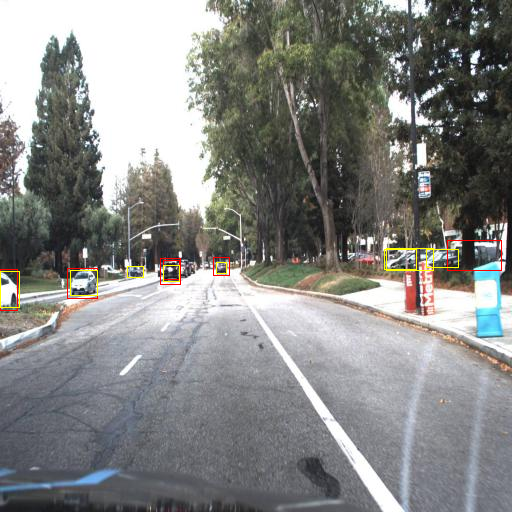

In [74]:
#Tonen van bounding boxes rond de auto's op 1 willekeurig gekozen image
#vervangen door https://stackoverflow.com/questions/23720875/opencv-draw-a-rectangle-around-a-region
import cv2
import random
from PIL import Image, ImageDraw

# Load the image
file_name = random.choice(os.listdir(sample_folder_predict))
image = Image.open(os.path.join(sample_folder_size_images, os.path.splitext(file_name)[0] + ".jpg"))
draw = ImageDraw.Draw(image)

print(file_name)
# Load corresponding truth-label file
with open(os.path.join(sample_folder_size_labels, file_name), 'r') as f:
    lines = f.readlines()
print(sample_folder_size_labels)
    
# Parse bounding box data and draw on the image
print("code vanuit truth labels-file")
for line in lines:
    print(line)
    class_id, x_center, y_center, width, height = map(float, line.strip().split())
    #class id 1 are cars,
    if class_id == 2:
        width *= image.width
        height *= image.height
        x_center *= image.width
        y_center *= image.height
        x_min = x_center - width / 2
        y_min = y_center - height / 2
        x_max = x_center + width / 2
        y_max = y_center + height / 2

        # Draw bounding box on the image
        draw.rectangle([x_min, y_min, x_max, y_max], outline="red")

print ("")
# Load corresponding predict-label file
with open(os.path.join(sample_folder_predict, file_name), 'r') as f:
    lines = f.readlines()

# Read label file and draw bounding boxes
print("code vanuit predict labels-file")
for line in lines:
  print(line)
  class_id, x_center, y_center, width, height = map(float, line.strip().split())
  if class_id == 2:
      width *= image.width
      height *= image.height
      x_center *= image.width
      y_center *= image.height
      x_min = x_center - width / 2
      y_min = y_center - height / 2
      x_max = x_center + width / 2
      y_max = y_center + height / 2

      # Draw bounding box on the image
      draw.rectangle([x_min, y_min, x_max, y_max], outline="yellow")
# Show the image with bounding boxes
print("truth box rood")
print("predict box geel")
display(image)

In [75]:
#alle beelden van de sample overlopen en truth- en predict-bounding boxes erop tekenen 
#Bounding box tonen rond de auto's voor de beide label-files: truth box rood, predict box geel
#saven in bounding_box_folder
import os
import cv2

def draw_bounding_boxes(image, labels, classes, kleur):
    global imagebb
    for label in labels:
        class_id, x_center, y_center, width, height = label
        if class_id in classes:
          width *= 518
          height *= 518
          x_center *= 518
          y_center *= 518
          x_min = int(x_center - width / 2)
          y_min = int(y_center - height / 2)
          x_max = int(x_center + width / 2)
          y_max = int(y_center + height / 2)

          # Draw bounding box on the image using OpenCV
          imagebb = cv2.rectangle(image, (x_min, y_min), (x_max, y_max), kleur)

if not os.path.exists(bounding_box_folder):
   os.makedirs(bounding_box_folder)

#truth bounding boxes aanbrengen
image_files_truth = os.listdir(sample_folder_size_images)

for image_file in image_files_truth:
   truth_labels = []
   image = cv2.imread(os.path.join(sample_folder_size_images, image_file))
   label_path_truth = os.path.join(sample_folder_size_labels, f"{os.path.splitext(image_file)[0]}.txt")
   with open(label_path_truth, 'r') as file:
            truth_labels.extend(list(map(float, line.strip().split())) for line in file)
   draw_bounding_boxes(image, truth_labels, [2], (0, 0, 255))
   cv2.imwrite(os.path.join(bounding_box_folder, f"{os.path.splitext(image_file)[0]}.jpg"), image)

#predict bounding boxes aanbrengen

image_files_bounding = os.listdir(bounding_box_folder)

for image_file in image_files_bounding:
   predict_labels = []
   image = cv2.imread(os.path.join(bounding_box_folder, image_file))
   label_path_predict = os.path.join(sample_folder_predict, os.path.splitext(image_file)[0] + ".txt")
   if os.path.exists(label_path_predict):
      with open(label_path_predict, 'r') as file:
                predict_labels.extend(list(map(float, line.strip().split())) for line in file)
      draw_bounding_boxes(image, predict_labels, [2], (0, 255, 255))
      cv2.imwrite(os.path.join(bounding_box_folder, f"{os.path.splitext(image_file)[0]}.jpg"), image)

In [76]:
#controle
print("Number of images in the sample_folder_size_images folder:", len(os.listdir(sample_folder_size_images)))
print("Number of images in the bounding box folder:", len(os.listdir(bounding_box_folder)))

Number of images in the sample_folder_size_images folder: 3024
Number of images in the bounding box folder: 3024


## 1.2 Augmentation (schemering aanbrengen)

**TODO: beslissen over augmentatiecriteria**


general guidelines and starting points for adjusting brightness and contrast to simulate twilight conditions:

*   Reduce Overall Brightness: Twilight scenes are typically dimmer compared to
daylight scenes. You can achieve this by reducing the overall brightness of the image.

*   Adjust Contrast: In twilight conditions, the contrast between highlights and shadows tends to be lower compared to daylight. You can decrease the contrast to create a softer, more subdued appearance.

### 1.2.1 Schemering aanbrengen met OpenCV

1478898711360522467_jpg.rf.zwMqvRPw3VRkISl7amWd.jpg



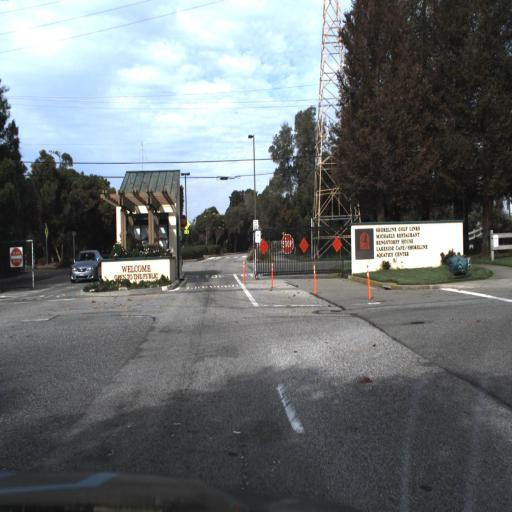
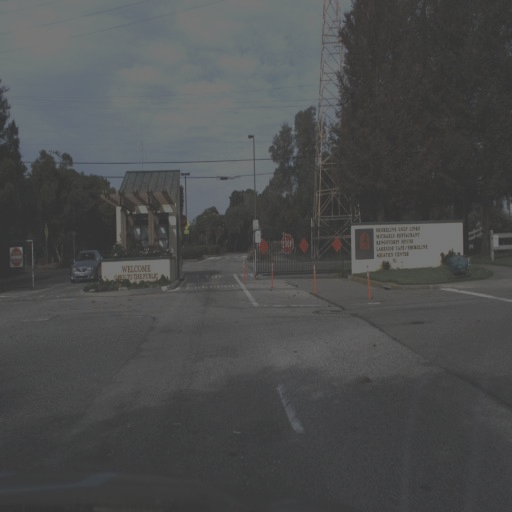
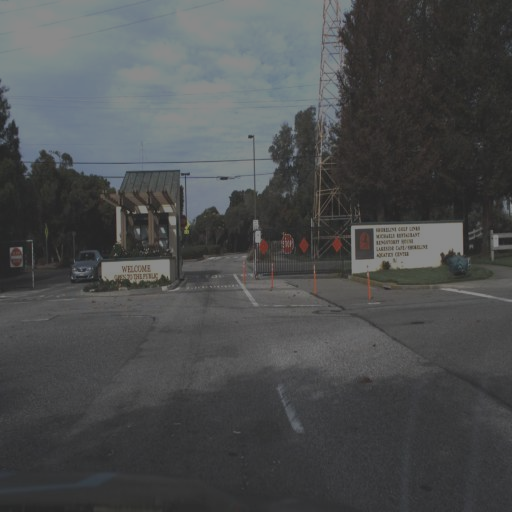
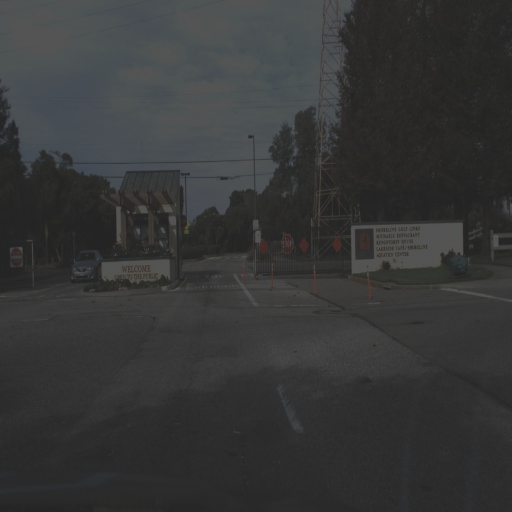
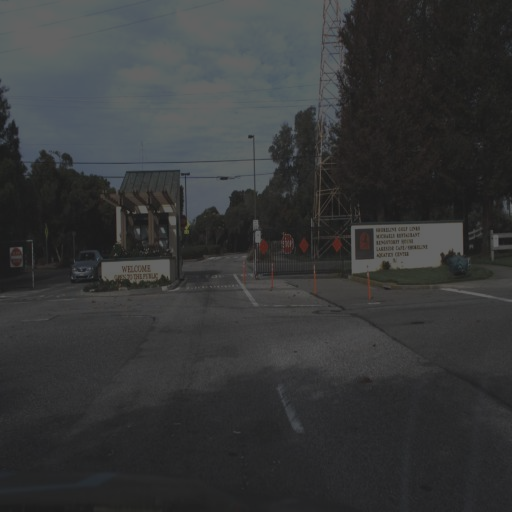

In [10]:
#basic example using OpenCV to adjust the brightness and contrast of an image to make it look duskier
#see https://www.tutorialspoint.com/how-to-change-the-contrast-and-brightness-of-an-image-using-opencv-in-python for an example
# alpha is the contrast value. To lower the contrast, use 0 < alpha < 1. And for higher contrast use alpha > 1.
# beta is the brightness value. A good range for brightness value is [-127, 127]
import cv2
import numpy as np
from PIL import Image, ImageDraw, ImageEnhance
from IPython.display import display, HTML
import io
import base64
import random
file_name = random.choice(os.listdir(sample_folder_size_images))
print(file_name)
image_path = os.path.join(sample_folder_size_images, os.path.splitext(file_name)[0] + ".jpg")


def adjust_brightness_contrast_side_by_side(image_path, contrast, brightness):
    # Open the image
    image = Image.open(image_path)
    
    # Adjust contrast
    enhancer = ImageEnhance.Contrast(image)
    image = enhancer.enhance(contrast)
    
    # Adjust brightness
    enhancer = ImageEnhance.Brightness(image)
    image = enhancer.enhance(1 + brightness / 100)  # Scale brightness appropriately
    
    return image

def adjust_brightness_contrast(image_path, alpha, beta):
    # Load the image
    image = Image.open(image_path)
    # Convert PIL Image to NumPy array
    image_np = np.array(image)
    # Adjust brightness and contrast
    adjusted_image_np = cv2.convertScaleAbs(image_np, alpha=alpha, beta=beta)
    return adjusted_image_np

def image_to_base64(image):
    buffered = io.BytesIO()
    image.save(buffered, format="PNG")
    return base64.b64encode(buffered.getvalue()).decode('utf-8')

# Original Image
image = Image.open(image_path)
original_image_base64 = image_to_base64(image)

# Adjusted Images
adjustments = [
    {"contrast": 0.4, "brightness": -30, "description": "Duskier Image proposal contrast=0.4 brightness=-30"},
    {"contrast": 0.6, "brightness": -30, "description": "Duskier Image proposal contrast=0.6 brightness=-30"},
    {"contrast": 0.4, "brightness": -50, "description": "Duskier Image proposal contrast=0.4 brightness=-50"},
    {"contrast": 0.6, "brightness": -50, "description": "Duskier Image proposal contrast=0.6 brightness=-50"},
]

html_content = "<div style='display: flex; flex-wrap: wrap;'>"

# Original Image
html_content += "<div style='margin: 10px; text-align: center;'><p>Original Image</p>"
html_content += "<img src='data:image/png;base64,{}' style='max-width: 400px;'><br></div>".format(original_image_base64)

# Adjusted Images
for adj in adjustments:
    adjusted_image = adjust_brightness_contrast_side_by_side(image_path, adj["contrast"], adj["brightness"])
    adjusted_image_base64 = image_to_base64(adjusted_image)
    html_content += "<div style='margin: 10px; text-align: center;'><p>{}</p>".format(adj["description"])
    html_content += "<img src='data:image/png;base64,{}' style='max-width: 400px;'><br></div>".format(adjusted_image_base64)

html_content += "</div>"

display(HTML(html_content))

## 1.3 Training Sets aanmaken

### 1.3.1 Training Sets obv augmentatie

In [4]:
#Foto's willekerig opdelen in trainingsets (folders bevatten dan de labels en images die bij elkaar horen)
#1 ongewijzigde beelden
#2 lichte_augmentatie beelden
#3 zware_augmentatie beelden

import os
import random
import shutil

# Create training folders
if not os.path.exists(training_sets_folder):
       os.makedirs(training_sets_folder)

# Function to create folders if they don't exist
def create_folders(folders):
    for folder in folders:
        folder_path = os.path.join(training_sets_folder, folder)
        if not os.path.exists(folder_path):
            os.makedirs(folder_path)

# Target folders
target_folders = ["ongewijzigd", "lichte_augmentatie", "zware_augmentatie"]

# Create target folders
create_folders(target_folders)

# Function to divide images and corresponding labels into three folders randomly
def divide_images(target_folders):
    # Get the list of image files
    image_files = [f for f in os.listdir(sample_folder_size_images) if f.endswith('.jpg')]

    # Shuffle the image files randomly
    random.shuffle(image_files)

    # Calculate how many images to put in each folder
    images_per_folder = len(image_files) // len(target_folders)
    print("images_per_folder: ", images_per_folder)
    # Distribute images to folders
    for i, folder in enumerate(target_folders):
        start_index = i * images_per_folder
        end_index = start_index + images_per_folder if i < len(target_folders) - 1 else len(image_files)
        teller = 0
        for image_file in image_files[start_index:end_index]:
            source_path = os.path.join(sample_folder_size_images, image_file)
            target_path = os.path.join(os.path.join(training_sets_folder, folder), image_file)
            shutil.copy(source_path, target_path)
            # Load corresponding label file
            label_file = os.path.splitext(image_file)[0] + ".txt"
            label_path = os.path.join(sample_folder_size_labels, label_file)
            if not os.path.exists(label_path):
                print(f"Label file not found for {image_file}")
                continue
            target_path = os.path.join(os.path.join(training_sets_folder, folder), label_file)
            shutil.copy(label_path, target_path)
        teller = 0
# Divide images into three folders randomly
divide_images(target_folders)

print("Images and labels divided into three folders successfully.")

images_per_folder:  1008
Images and labels divided into three folders successfully.


#### 1.3.1 Augmentatie toepassen in de folders overdag_augmentatie en augmentatie

In [11]:
import os

def adjust_images_in_folder(folder_path, alpha, beta):
    # loop over all files in the folder
    for filename in os.listdir(folder_path):
        # Check if the file is an image
        if filename.endswith('.jpg'):
            # Read the image
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path)
            if image is not None:
                # Adjust brightness and contrast
                image = Image.open(image_path)
                image_np = np.array(image)
                adjusted_image_np = adjust_brightness_contrast(image_path,alpha, beta)
                #adjusted_image_np = cv2.convertScaleAbs(image_np, alpha=alpha, beta=beta)
                # Overwrite the original image
                cv2.imwrite(image_path, adjusted_image_np)
    print(f"Adjusted and overwritten: {folder_path}")

# Adjust images in the folders
adjust_images_in_folder(os.path.join(training_sets_folder, "lichte_augmentatie"), 0.8, -30)
adjust_images_in_folder(os.path.join(training_sets_folder, "zware_augmentatie"), 0.6, -50)

Adjusted and overwritten: ./sampleSize10000\training_sets\lichte_augmentatie
Adjusted and overwritten: ./sampleSize10000\training_sets\zware_augmentatie


### 1.3.2 Training Sets verder opsplitsen obv treshhold

In [12]:
#Check of alle beelden wel een label-file hebben (anders kan je geen bounding boxes berekenen)
import os

def count_images_without_label(folder_path):
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]
    count_images_without_label = 0
    for file in image_files:
      # Load corresponding label file
      label_file = os.path.splitext(file)[0] + ".txt"
      label_path = os.path.join(folder_path, label_file)
      if not os.path.exists(label_path):
        count_images_without_label +=1
    return  count_images_without_label

print("aantal beelden zonder labelfile")
print(count_images_without_label(os.path.join(training_sets_folder, "ongewijzigd")))
print(count_images_without_label(os.path.join(training_sets_folder, "zware_augmentatie")))
print(count_images_without_label(os.path.join(training_sets_folder, "lichte_augmentatie")))

aantal beelden zonder labelfile
0
0
0


In [13]:
#tellen van auto's in 1 label-file
import os

def calculateNumberOfCars(label_file, class_ids):
    #returns the number of cars in the label_file
    number_cars = 0
    # Iterate through each line
    with open(label_file, 'r') as file:
        lines = file.readlines()
        for line in lines:
            # Parse label file
            label = line.strip().split()
            class_id = int(label[0])
            if class_id in class_ids:
              number_cars += 1
    return number_cars

In [14]:
#functie: gemiddelde en mediaan berekenen van aantal auto's per beeld in de folder
#returns a DataFrame containing IDs and their respective percentages, along with the total average percentage and median percentage across all files.
import os
import pandas as pd
import numpy as np

def calculate_total_average_median_percentage(source_folder):
    # Get list of label files
    label_files = [f for f in os.listdir(source_folder) if f.endswith('.txt')]
    total_average_percentage = 0

    # Create an empty list to store the data
    data = []

    # Iterate over label files and calculate percentage
    for idx, label_file in enumerate(label_files, start=1):
        label_path = os.path.join(source_folder, label_file)
        percentage = calculateNumberOfCars(label_path, [2])
        total_average_percentage += percentage
        data.append((idx, percentage))

    # Create DataFrame
    df = pd.DataFrame(data, columns=['ID', 'Percentage'])

    # Calculate total average percentage
    total_average_percentage /= len(label_files)

    # Calculate median percentage
    median_percentage = np.median(df['Percentage'])

    return df, total_average_percentage, median_percentage

In [15]:
df, total_average_percentage,median_percentage = calculate_total_average_median_percentage(sample_folder_size_labels)
print(f"Average number of cars in the folder {sample_folder_size_labels}:", total_average_percentage, "  median_number_of_cars:", median_percentage)
source_folder = os.path.join(training_sets_folder, "zware_augmentatie")
df, total_average_percentage,median_percentage = calculate_total_average_median_percentage(source_folder)
print(f"Average number of cars in the folder {source_folder}:", total_average_percentage, "  median_number_of_cars:", median_percentage)
source_folder = os.path.join(training_sets_folder, "lichte_augmentatie")
df, total_average_percentage,median_percentage = calculate_total_average_median_percentage(source_folder)
print(f"Average number of cars in the folder {source_folder}:", total_average_percentage, "  median_number_of_cars:", median_percentage)
source_folder = os.path.join(training_sets_folder, "ongewijzigd")
df, total_average_percentage,median_percentage = calculate_total_average_median_percentage(source_folder)
print(f"Average number of cars in the folder {source_folder}:", total_average_percentage, "  median_number_of_cars:", median_percentage)

Average number of cars in the folder ./sampleSize10000\labels: 4.554563492063492   median_number_of_cars: 4.0
Average number of cars in the folder ./sampleSize10000\training_sets\zware_augmentatie: 4.597222222222222   median_number_of_cars: 4.0
Average number of cars in the folder ./sampleSize10000\training_sets\lichte_augmentatie: 4.455357142857143   median_number_of_cars: 4.0
Average number of cars in the folder ./sampleSize10000\training_sets\ongewijzigd: 4.611111111111111   median_number_of_cars: 4.0


In [16]:
#trainingsets verder opdelen qua tresh-hold (bevatten labels en images)
#treshhold = aantal auto's per beeld
#Treshhold zetten zodat we gebalanceerde dataset bereiken

import os
import random
import shutil

# Target folders
target_folders = ["onder_de_grens", "boven_de_grens"]

# Function to create folders if they don't exist
def create_folders(training_sets_folder, folders):
    for folder in folders:
        folder_path = os.path.join(training_sets_folder, folder)
        if not os.path.exists(folder_path):
            os.makedirs(folder_path)

# Create target folders
create_folders(os.path.join(training_sets_folder, "ongewijzigd"),target_folders)
create_folders(os.path.join(training_sets_folder, "lichte_augmentatie"),target_folders)
create_folders(os.path.join(training_sets_folder, "zware_augmentatie"),target_folders)

def copy_images_based_on_threshold(source_folder, threshold):
    # Get list of label files in the source folder
    label_files = [f for f in os.listdir(source_folder) if f.endswith('.txt')]
    # Iterate through each image file
    for label_file in label_files:
        label_path = os.path.join(source_folder, label_file)
        image_file = os.path.splitext(label_file)[0] + ".jpg"
        # Decide which target folder to copy the image to based on brightness threshold
        if calculateNumberOfCars(label_path,[2]) > threshold:
            target_path_image = os.path.join(source_folder, "boven_de_grens", image_file)
            target_path_label = os.path.join(source_folder, "boven_de_grens", label_file)
        else:
            target_path_image = os.path.join(source_folder, "onder_de_grens", image_file)
            target_path_label = os.path.join(source_folder, "onder_de_grens", label_file)
        # Copy labelfile to the appropriate target folder
        shutil.copy(label_path, target_path_label)

        #copy image-file to the appropriate target folder
        source_path = os.path.join(source_folder, image_file)
        shutil.copy(source_path, target_path_image)

# Divide images into three folders randomly
copy_images_based_on_threshold(os.path.join(training_sets_folder, "ongewijzigd"),4)

copy_images_based_on_threshold(os.path.join(training_sets_folder, "lichte_augmentatie"),4)

copy_images_based_on_threshold(os.path.join(training_sets_folder, "zware_augmentatie"),4)


#tellingen en uitprinten aantal bestanden per folder
def count_files(folder_path):
  num_files = 0
  for filename in os.listdir(folder_path):
    if os.path.isfile(os.path.join(folder_path, filename)):
      num_files += 1
  return num_files

#check op balans in de datasets
folder_path = os.path.join(training_sets_folder, "ongewijzigd","onder_de_grens")
number_of_images = count_files(folder_path)/2
print(f"There are {number_of_images} images in the folder {folder_path}.")
folder_path = os.path.join(training_sets_folder, "ongewijzigd","boven_de_grens")
number_of_images = count_files(folder_path)/2
print(f"There are {number_of_images} files in the folder {folder_path}.")
folder_path = os.path.join(training_sets_folder, "lichte_augmentatie","onder_de_grens")
number_of_images = count_files(folder_path)/2
print(f"There are {number_of_images} files in the folder {folder_path}.")
folder_path = os.path.join(training_sets_folder, "lichte_augmentatie","boven_de_grens")
number_of_images = count_files(folder_path)/2
print(f"There are {number_of_images} files in the folder {folder_path}.")
folder_path = os.path.join(training_sets_folder, "zware_augmentatie","onder_de_grens")
number_of_images = count_files(folder_path)/2
print(f"There are {number_of_images} files in the folder {folder_path}.")
folder_path = os.path.join(training_sets_folder, "zware_augmentatie","boven_de_grens")
number_of_images = count_files(folder_path)/2
print(f"There are {number_of_images} files in the folder {folder_path}.")
print("Met deze folders gaan we de predictie, training & validatie doen")

There are 585.0 images in the folder ./sampleSize10000\training_sets\ongewijzigd\onder_de_grens.
There are 423.0 files in the folder ./sampleSize10000\training_sets\ongewijzigd\boven_de_grens.
There are 594.0 files in the folder ./sampleSize10000\training_sets\lichte_augmentatie\onder_de_grens.
There are 414.0 files in the folder ./sampleSize10000\training_sets\lichte_augmentatie\boven_de_grens.
There are 574.0 files in the folder ./sampleSize10000\training_sets\zware_augmentatie\onder_de_grens.
There are 434.0 files in the folder ./sampleSize10000\training_sets\zware_augmentatie\boven_de_grens.
Met deze folders gaan we de predictie, training & validatie doen


In [61]:
#predictlabels onder de juiste folder zetten
nog nodig?
import os
import shutil

def copylabels (path):
    dest_path = os.path.join(training_sets_folder, path)
    if not os.path.exists(os.path.join(sample_folder_size, "Yolo_output","predict",path,"predict/labels")):
            os.makedirs(os.path.join(sample_folder_size, "Yolo_output","predict",path,"predict/labels"))
    # Get list of image files
    label_files = [os.path.join(dest_path, f) for f in os.listdir(dest_path) if f.endswith('.txt')]
    # Iterate through each image file
    for label_file in label_files:
        if os.path.exists(os.path.join(sample_folder_predict,os.path.basename(label_file))):
            shutil.copy(os.path.join(sample_folder_predict,os.path.basename(label_file)),
                          os.path.join(sample_folder_size, "Yolo_output","predict",path,"predict/labels"))
            
copylabels("ongewijzigd/onder_de_grens")
copylabels("ongewijzigd/boven_de_grens")
copylabels("lichte_augmentatie/onder_de_grens")
copylabels("lichte_augmentatie/boven_de_grens")
copylabels("zware_augmentatie/onder_de_grens")
copylabels("zware_augmentatie/boven_de_grens")

dest_path:  ./sampleSize10000\training_sets\ongewijzigd/onder_de_grens
label_file:  ./sampleSize10000\training_sets\ongewijzigd/onder_de_grens\1478019953180167674_jpg.rf.8a816c9d7e9b423a63ed6ecd4a663e47.txt
1e path ./sampleSize10000\Yolo_output\predict\labels\1478019953180167674_jpg.rf.8a816c9d7e9b423a63ed6ecd4a663e47.txt
2e path ./sampleSize10000\Yolo_output\predict\ongewijzigd/onder_de_grens\predict/labels
label_file:  ./sampleSize10000\training_sets\ongewijzigd/onder_de_grens\1478019955185244088_jpg.rf.gJpj2eCO1Dd7Sic9WlhE.txt
1e path ./sampleSize10000\Yolo_output\predict\labels\1478019955185244088_jpg.rf.gJpj2eCO1Dd7Sic9WlhE.txt
2e path ./sampleSize10000\Yolo_output\predict\ongewijzigd/onder_de_grens\predict/labels
label_file:  ./sampleSize10000\training_sets\ongewijzigd/onder_de_grens\1478019958682197101_jpg.rf.XCoBnRWpmUTZFpYFGG3Y.txt
1e path ./sampleSize10000\Yolo_output\predict\labels\1478019958682197101_jpg.rf.XCoBnRWpmUTZFpYFGG3Y.txt
2e path ./sampleSize10000\Yolo_output\pred

# 2 Afhankelijke variabelen

### 2.1 IoU

Intersection over Union measures the overlap between two bounding boxes, typically the predicted bounding box and the ground truth bounding box of an object. If the predicted bounding box overlaps perfectly with the ground truth bounding box, the IoU would be 1. If there's no overlap at all, the IoU would be 0.

Vele beelden hebben meerdere auto's dus meerdere boxen. Voor het bepalen van de IoU gaan we de truth-boxes 1 voor 1 vergelijken met de predicted boxes en enkel de box overhouden die hiermee maximaal matcht.


In [78]:
import statistics
#voorbeeld onder https://pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection/
def calculate_iou(gt_box, pred_box, eps=1e-7):
    """
    Calculates the IoU between two bounding boxes.
    Source code:https://docs.ultralytics.com/reference/utils/metrics/#ultralytics.utils.metrics.bbox_iou
    Args:
        gt_box (list): Ground truth bounding box (classid, x_center, y_center, width, height).
        pred_box (list): Predicted bounding box (classid, x_center, y_center, width, height).

    Returns:
        float: The IoU value between the two boxes.
    """
    # Extract coordinates for both boxes
    x1, y1, w1, h1  = map(float, gt_box.split()[1:])
    x2, y2, w2, h2 = map(float, pred_box.split()[1:])
    w1_, h1_, w2_, h2_ = w1 / 2, h1 / 2, w2 / 2, h2 / 2
    b1_x1, b1_x2, b1_y1, b1_y2 = x1 - w1_, x1 + w1_, y1 - h1_, y1 + h1_
    b2_x1, b2_x2, b2_y1, b2_y2 = x2 - w2_, x2 + w2_, y2 - h2_, y2 + h2_
    
    # Intersection area
    inter = (max(0,min(b1_x2,b2_x2) - max(b1_x1,b2_x1))) * max(0,(min(b1_y2,b2_y2) - max(b1_y1,b2_y1)))

    # Union Area
    union = w1 * h1 + w2 * h2 - inter + eps

    # IoU
    iou = inter / union
    return iou


def calculate_multiple_iou(gt_boxes, pred_boxes, class_ids):
    """
    Calculates IoU for each ground truth box and the best matching predicted box.

    Args:
        gt_boxes (list of lists): List of ground truth bounding boxes (classid, x_center, y_center, width, height).
        pred_boxes (list of lists): List of predicted bounding boxes (classid, x_center, y_center, width, height).

    Returns:
        list of floats: List of IoU values for each ground truth box.
    """

    iou_list = []
    with open(gt_boxes, 'r') as gt_file:
        gt_boxes = gt_file.readlines()
        for gt_box in gt_boxes:
            label_truth = gt_box.strip().split()
            class_id_truth = int(label_truth[0])
            if class_id_truth == class_ids:
              max_iou = 0.0
              best_pred_box = None
              with open(pred_boxes, 'r') as pred_file:
                  pred_boxes2 = pred_file.readlines()
                  for pred_box in pred_boxes2:
                      label_predict = pred_box.strip().split()
                      class_id_predict = int(label_predict[0])
                      if class_id_predict in [class_ids]:
                          iou = calculate_iou(gt_box, pred_box)
                          if iou > max_iou:
                              max_iou = iou
                              best_pred_box = pred_box
              iou_list.append(max_iou)
    return iou_list

def calculate_IoU_Percentage(index,phase,truth_folder, predict_folder,class_ids):
    """
    Calculates detected car percentage for all labels in a folder
    Args:
        folder containing the labels
    Returns:
        list of percentages (length of list is the number of label-files)
    """
    outer_list = []
    # Get list of label files in the folder
    truth_label_files = [f for f in os.listdir(truth_folder) if f.endswith('.txt')]
    # Iterate through each label file
    for idx, label_file in enumerate(truth_label_files, start=index):
        truth_path_label = os.path.join(truth_folder, label_file)
        predict_path_label = os.path.join(predict_folder, label_file)
        #controle voor als Yolov8 geen labelfile heeft gemaakt wegens geen detectie
        if os.path.exists(predict_path_label):
            iou_list = calculate_multiple_iou(truth_path_label,predict_path_label,class_ids)
        else:
            iou_list = [0]
        if iou_list:
            percentage = statistics.mean(iou_list)
        else:
            percentage = 0
        outer_list.append((phase,idx, percentage))
    return outer_list

### 2.2 auto's tellen

In [18]:
#vergelijken autotellingen uit 2 folders
import pandas as pd
import os

def calculateCarPercentage(index,phase,truth_folder, predict_folder, class_ids):
    """
    Calculates detected car percentage for all labels in a folder
    Class_ids for the cars is 2
    Args:
        folder containing the labels
    Returns:
        list of percentages (length of list is the number of label-files)
    """
    outer_list = []
    # Get list of label files in the folder
    truth_label_files = [f for f in os.listdir(truth_folder) if f.endswith('.txt')]
    # Iterate through each label file
    for idx, label_file in enumerate(truth_label_files, start=index):
        truth_path_label = os.path.join(truth_folder, label_file)
        truth_number_cars = calculateNumberOfCars(truth_path_label, class_ids)
        predict_path_label = os.path.join(predict_folder, label_file)
        #controle voor als Yolov8 geen labelfile heeft gemaakt wegens geen detectie
        if os.path.exists(predict_path_label):
            predict_number_cars = calculateNumberOfCars(predict_path_label, class_ids)
        else:
            predict_number_cars = 0
        if truth_number_cars != 0:
           percentage =  predict_number_cars/truth_number_cars
        else:
           percentage = 0
        outer_list.append((phase,idx, percentage))
    return outer_list

## 2.2 Predictie door YoloV8 model

#### 2.2.1 IoU-resultaten van predictie YoloV8 model op 1 beeld

File name:  1478899679697083025_jpg.rf.da0dd94b0bb11cf2aa1b3fe56b4d7653.txt
Truth label file
2 0.11328125 0.5546875 0.0927734375 0.0830078125
2 0.1689453125 0.517578125 0.0341796875 0.0419921875
2 0.216796875 0.544921875 0.1005859375 0.1064453125
2 0.2724609375 0.5302734375 0.0673828125 0.099609375
2 0.435546875 0.5087890625 0.0283203125 0.0595703125
2 0.4951171875 0.5185546875 0.0791015625 0.1162109375
2 0.9755859375 0.525390625 0.046875 0.14453125

Predict label file
2 0.489798 0.521468 0.0968666 0.109618
2 0.123289 0.557111 0.118374 0.0997997
2 0.220592 0.55339 0.110961 0.11523
2 0.977608 0.541025 0.0442791 0.106677
2 0.439405 0.507768 0.0359285 0.0505744
2 0.266659 0.524753 0.0755439 0.0903873
2 0.401867 0.506026 0.0489801 0.0302886
2 0.401802 0.50153 0.0467114 0.0220524

iou_list  [0.6518585744702349, 0.07814924273899293, 0.7803012610712283, 0.766500734660712, 0.6890521092488777, 0.778366783703595, 0.6780716441243083]
IoU boxes percentage:  [0.6518585744702349, 0.07814924273899293

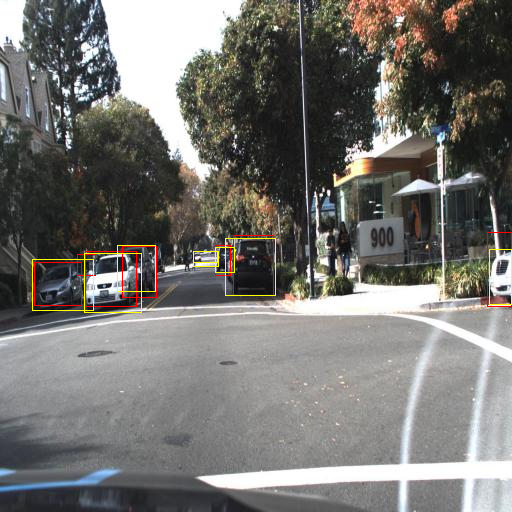

In [71]:
import statistics
import random
file_name = random.choice(os.listdir(sample_folder_size_labels))
print("File name: ", file_name)

truth_file = os.path.join(sample_folder_size_labels, file_name)
predict_file = os.path.join(sample_folder_predict, file_name)

with open(truth_file, "r") as file:
    # Read the entire content of the file
    content = file.read()
    # Print the content
    print("Truth label file")
    print(content)

with open(predict_file, "r") as file:
    # Read the entire content of the file
    content = file.read()
    # Print the content
    print("Predict label file")
    print(content)


print("IoU boxes percentage: ", calculate_multiple_iou(truth_file,predict_file,2 ))
print("Average: ",statistics.mean(calculate_multiple_iou(truth_file,predict_file,2 )))
      
#Tonen van bounding boxes rond de auto's op 1 willekeurig gekozen image
#Auto's zijn class_id 1 in de truth label-file en class_id 2 in de predict label-file
#vervangen door https://stackoverflow.com/questions/23720875/opencv-draw-a-rectangle-around-a-region
import cv2
from PIL import Image, ImageDraw

# Load the image
image = Image.open(os.path.join(sample_folder_size_images, os.path.splitext(file_name)[0] + ".jpg"))
draw = ImageDraw.Draw(image)

print(file_name)
# Load corresponding truth-label file
with open(os.path.join(sample_folder_size_labels, file_name), 'r') as f:
    lines = f.readlines()
    
# Parse bounding box data and draw on the image
for line in lines:
    class_id, x_center, y_center, width, height = map(float, line.strip().split())
    #class id 1 are cars,
    if class_id == 2:
        width *= image.width
        height *= image.height
        x_center *= image.width
        y_center *= image.height
        x_min = x_center - width / 2
        y_min = y_center - height / 2
        x_max = x_center + width / 2
        y_max = y_center + height / 2

        # Draw bounding box on the image
        draw.rectangle([x_min, y_min, x_max, y_max], outline="red")

print ("")
# Load corresponding predict-label file
with open(os.path.join(sample_folder_predict, file_name), 'r') as f:
    lines = f.readlines()

# Read label file and draw bounding boxes
for line in lines:
  class_id, x_center, y_center, width, height = map(float, line.strip().split())
  if class_id == 2:
      width *= image.width
      height *= image.height
      x_center *= image.width
      y_center *= image.height
      x_min = x_center - width / 2
      y_min = y_center - height / 2
      x_max = x_center + width / 2
      y_max = y_center + height / 2

      # Draw bounding box on the image
      draw.rectangle([x_min, y_min, x_max, y_max], outline="yellow")
# Show the image with bounding boxes
print("truth box rood")
print("predict box geel")
display(image)

#### 2.2.2 Autotellingen-resultaten van predictie YoloV8 model op 1 beeld

File name:  1478732303748634478_jpg.rf.b3721262ca92b7363c885c4e9363ae36.txt
code vanuit truth-labels-file
2 0.0244140625 0.4619140625 0.0478515625 0.103515625

2 0.087890625 0.484375 0.1083984375 0.087890625

2 0.158203125 0.4765625 0.0537109375 0.0703125

2 0.2490234375 0.46875 0.060546875 0.0634765625

2 0.5126953125 0.5 0.0732421875 0.0966796875

2 0.6455078125 0.4970703125 0.056640625 0.0634765625

2 0.7314453125 0.51953125 0.1064453125 0.1103515625

2 0.83984375 0.5048828125 0.0732421875 0.0771484375

2 0.9013671875 0.51171875 0.0517578125 0.0634765625

2 0.9638671875 0.5234375 0.0712890625 0.0771484375

truth box rood
predict box geel


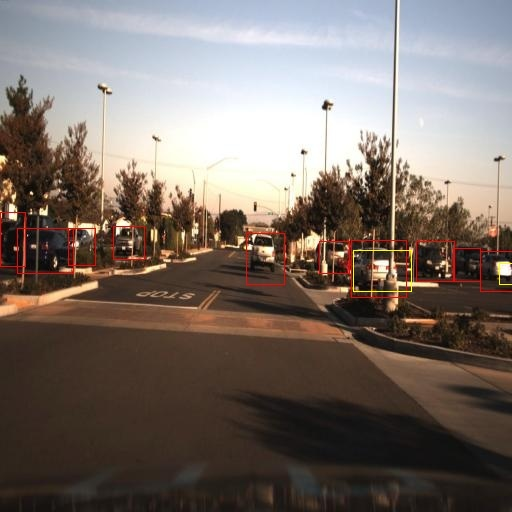

code vanuit predict-labels-file
2 0.739025 0.523535 0.111931 0.0782463

5 0.514424 0.48836 0.0456005 0.0623014

2 0.982078 0.528937 0.0347762 0.0406706

aantal auto's truth 10.
aantal auto's predict 2.
percentage herkende auto's: 0.2


In [11]:
import os

file_name = random.choice(os.listdir(sample_folder_size_labels))
print("File name: ", file_name)

truth_file = os.path.join(sample_folder_size_labels, file_name)
predict_file = os.path.join(sample_folder_predict, file_name)

# Load and print label files
with open(truth_file, 'r') as f:
    lines = f.readlines()
    print("code vanuit truth-labels-file")
    for line in lines:
      print(line)

print("truth box rood")
print("predict box geel")

#display image
image = Image.open(os.path.join(bounding_box_folder , os.path.splitext(file_name)[0] + ".jpg"))
display(image)

with open(predict_file, 'r') as f:
    lines = f.readlines()
    print("code vanuit predict-labels-file")
    for line in lines:
      print(line)

truth_number_cars= calculateNumberOfCars(truth_file,[2])
predict_number_cars = calculateNumberOfCars(predict_file,[2])

print(f"aantal auto's truth {truth_number_cars}.")
print(f"aantal auto's predict {predict_number_cars}.")
print("percentage herkende auto's:", predict_number_cars/truth_number_cars)

# 3 Training

## 3.1 Voorbereiding

In [62]:
#aanmaken van de training, validatie en test-folders voor alle datasets 
# Aanmaken folders
target_folders = ["images", "labels"]
sub_target_folders = ["train", "val","test"]

# Function to create folders if they don't exist
def create_folders(training_sets_folder):
    for folder in target_folders:
        folder_path = os.path.join(training_sets_folder, folder)
        if not os.path.exists(folder_path):
            for subfolder in sub_target_folders:
                sub_folder_path = os.path.join(folder_path, subfolder)
                os.makedirs(sub_folder_path)

# Create target folders
create_folders(os.path.join(training_sets_folder, "ongewijzigd/onder_de_grens"))
create_folders(os.path.join(training_sets_folder, "ongewijzigd/boven_de_grens"))
create_folders(os.path.join(training_sets_folder, "lichte_augmentatie/onder_de_grens"))
create_folders(os.path.join(training_sets_folder, "lichte_augmentatie/boven_de_grens"))
create_folders(os.path.join(training_sets_folder, "zware_augmentatie/onder_de_grens"))
create_folders(os.path.join(training_sets_folder, "zware_augmentatie/boven_de_grens"))
create_folders(training_sets_folder)

In [63]:
#aanpassen van de class_id's in de label-files want in de Yaml-file van het model 
#staat maar 1 klasse (we detecteren enkel auto's), dus deze klasse moet 0 zijn 

import os

# Function to update class IDs
def update_class_ids(label_file):
    updated_lines = []
    with open(label_file, 'r') as file:
        lines = file.readlines()
        for line in lines:
            parts = line.strip().split()
            class_id = int(parts[0])
            if class_id == 2:
                parts[0] = '0'  
                updated_lines.append(' '.join(parts) + '\n')
    with open(label_file, 'w') as file:
        file.writelines(updated_lines)

# Process all label files in the directory
def update_class_ids_folder(folder_path):
    # Get list of all label files in the predict folder
    label_txt_files = [f for f in os.listdir(folder_path) if f.endswith('.txt')]
    for label_file in label_txt_files:
        file_path = os.path.join(folder_path, label_file)
        update_class_ids(file_path)

In [64]:
#80-10-10 split voor training-validation-test
from sklearn.model_selection import train_test_split
import os
import shutil

def splitten (path):
    # Get list of image files
    image_files = [os.path.join(path, f) for f in os.listdir(path) if f.endswith('.jpg')]
    # Split dataset into train, val, and test sets
    train_files, temp_files = train_test_split(image_files, test_size=0.2, random_state=42)
    val_files, test_files = train_test_split(temp_files, test_size=0.5, random_state=42) 
    # Iterate through each image file
    for image_train_file in train_files:
        shutil.copy(image_train_file, os.path.join(path,"images/train"))
        shutil.copy(os.path.join(os.path.dirname(image_train_file),os.path.basename(image_train_file).replace('.jpg', '.txt')), os.path.join(path,"labels/train"))
    for image_val_file in val_files:
        shutil.copy(image_val_file, os.path.join(path,"images/val"))
        shutil.copy(os.path.join(os.path.dirname(image_val_file),os.path.basename(image_val_file).replace('.jpg', '.txt')), os.path.join(path,"labels/val"))    
    #unifying the testset (same test set for all models, so destination is not set by path)
    for image_test_file in test_files:
        shutil.copy(image_test_file, os.path.join(training_sets_folder,"images/test"))
        shutil.copy(os.path.join(os.path.dirname(image_test_file),os.path.basename(image_test_file).replace('.jpg', '.txt')), os.path.join(training_sets_folder,"labels/test"))


splitten(os.path.join(training_sets_folder, "ongewijzigd/onder_de_grens"))
update_class_ids_folder(os.path.join(training_sets_folder, "ongewijzigd/onder_de_grens","labels/train"))
update_class_ids_folder(os.path.join(training_sets_folder, "ongewijzigd/onder_de_grens","labels/val"))

splitten(os.path.join(training_sets_folder, "ongewijzigd/boven_de_grens"))
update_class_ids_folder(os.path.join(training_sets_folder, "ongewijzigd/boven_de_grens","labels/train"))
update_class_ids_folder(os.path.join(training_sets_folder, "ongewijzigd/boven_de_grens","labels/val"))

splitten(os.path.join(training_sets_folder, "lichte_augmentatie/onder_de_grens"))
update_class_ids_folder(os.path.join(training_sets_folder, "lichte_augmentatie/onder_de_grens","labels/train"))
update_class_ids_folder(os.path.join(training_sets_folder, "lichte_augmentatie/onder_de_grens","labels/val"))

splitten(os.path.join(training_sets_folder, "lichte_augmentatie/boven_de_grens"))
update_class_ids_folder(os.path.join(training_sets_folder, "lichte_augmentatie/boven_de_grens","labels/train"))
update_class_ids_folder(os.path.join(training_sets_folder, "lichte_augmentatie/boven_de_grens","labels/val"))

splitten(os.path.join(training_sets_folder, "zware_augmentatie/onder_de_grens"))
update_class_ids_folder(os.path.join(training_sets_folder, "zware_augmentatie/onder_de_grens","labels/train"))
update_class_ids_folder(os.path.join(training_sets_folder, "zware_augmentatie/onder_de_grens","labels/val"))

splitten(os.path.join(training_sets_folder, "zware_augmentatie/boven_de_grens"))
update_class_ids_folder(os.path.join(training_sets_folder, "zware_augmentatie/boven_de_grens","labels/train"))
update_class_ids_folder(os.path.join(training_sets_folder, "zware_augmentatie/boven_de_grens","labels/val"))

update_class_ids_folder(os.path.join(training_sets_folder, "labels/test"))
update_class_ids_folder(os.path.join(sample_folder_size, "Yolo_output", "predict/labels"))

### Benchmarks aanmaken op de testset met YOLOv8 predict out of the box

In [79]:
import pandas as pd

df_final= pd.DataFrame()

def update_scores(index,phase):
    # Construct the full paths
    truth_path = os.path.join(training_sets_folder,"labels/test")
    predict_path = os.path.join(sample_folder_size, "Yolo_output", "predict/labels")
    
    # Call the functions to get the benchmark results
    IOU_benchmark = calculate_IoU_Percentage(index,phase, truth_path, predict_path, 0)
    NDC_benchmark = calculateCarPercentage(index,phase, truth_path, predict_path, [0])

    # Create DataFrames from the results
    df_IOU = pd.DataFrame(IOU_benchmark, columns=['Phase', 'ID', 'IOU'])
    df_NDC = pd.DataFrame(NDC_benchmark, columns=['Phase', 'ID', 'NDC'])

    # Merge the DataFrames on 'Benchmark' and 'ID'
    merged_df = pd.merge(df_NDC, df_IOU, on=["Phase", "ID"])

    return merged_df

df_final = update_scores(1,"Benchmark")

In [80]:
import pandas as pd
# Calculate mean, median, standard deviation, and variance per benchmark-string for IOU
iou_statistics = df_final.groupby('Phase')['IOU'].agg(['mean', 'median', 'std', 'var']).reset_index()
iou_statistics.columns = ['Phase', 'IOU Mean', 'IOU Median', 'IOU Std', 'IOU Variance']

# Calculate mean, median, standard deviation, and variance per benchmark-string for NDC
ndc_statistics = df_final.groupby('Phase')['NDC'].agg(['mean', 'median', 'std', 'var']).reset_index()
ndc_statistics.columns = ['Phase', 'NDC Mean', 'NDC Median', 'NDC Std', 'NDC Variance']

# Convert statistics DataFrames to HTML tables
iou_html = iou_statistics.to_html(index=False)
ndc_html = ndc_statistics.to_html(index=False)

# Display HTML tables in Jupyter Notebook
from IPython.display import display, HTML

display(HTML(iou_html))

display(HTML(ndc_html))


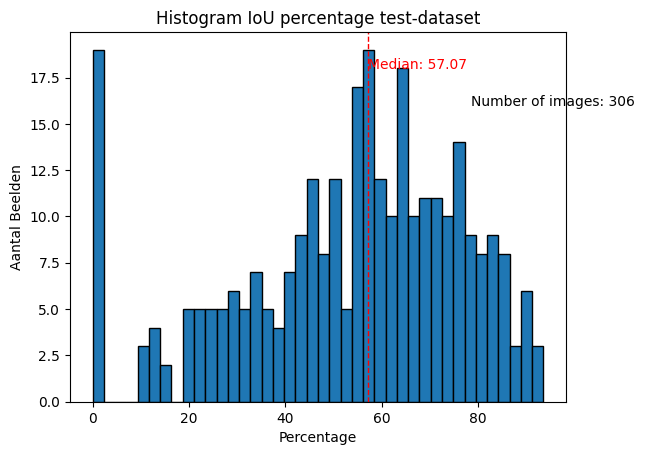

In [82]:
#voorbeeldplot 1 folder
import matplotlib.pyplot as plt

#df_filtered = df_final[df_final['Phase'] == 'BM_ongewijzigde beelden onder de grens']

# Specify number of bins for the histogram
num_bins = 40

# Plot histogram
plt.hist(df_final['IOU'] * 100, bins=num_bins, edgecolor='black')

# Calculate median
median_percentage = (df_final['IOU']* 100).median()

# Add vertical line for median
plt.axvline(median_percentage, color='red', linestyle='dashed', linewidth=1)

# Add labels and title
plt.xlabel('Percentage')
plt.ylabel('Aantal Beelden')
plt.title('Histogram IoU percentage test-dataset')

# Show median value
plt.text(median_percentage, plt.ylim()[1]*0.9, f'Median: {median_percentage:.2f}', color='red')

# Calculate number of unique IDs
num_unique_ids = df_final['ID'].nunique()

# Add legend
plt.text(plt.xlim()[1]*0.8, plt.ylim()[1]*0.8, f'Number of images: {num_unique_ids}', fontsize=10)

# Show plot
plt.show()


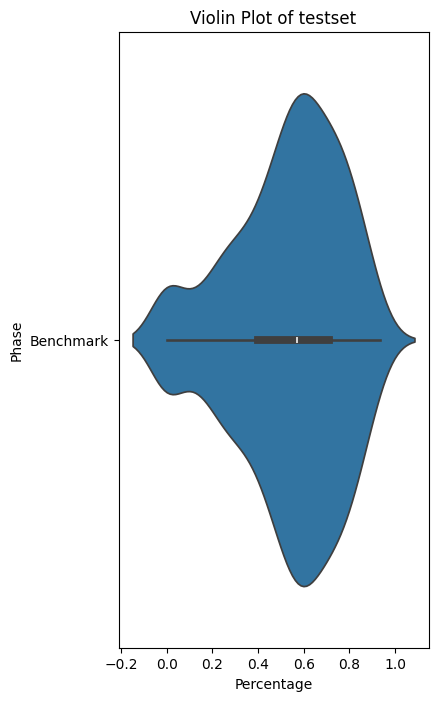

In [83]:
#voorbeeldplot alle folders
import matplotlib.pyplot as plt
import seaborn as sns

df_filtered = df_final[df_final['Phase'].str.startswith('BM_')]

# Box Plot
#plt.figure(figsize=(6, 12))
#sns.boxplot(y='Benchmark', x='Percentage', data=df_benchmark)
#plt.ylabel('Benchmark')
#plt.xlabel('Percentage')
#plt.title('Box Plot of Percentages by Benchmark')
#plt.yticks(rotation=0)  # No need to rotate y-axis labels typically
#plt.show()

# Violin Plot ==> It shows the median, quartiles, and potential outliers. but also shows the density of the data at 
# different values. This can provide more insight into the distribution.
plt.figure(figsize=(4, 8))
sns.violinplot(y='Phase', x='IOU', data=df_final)
plt.ylabel('Phase')
plt.xlabel('Percentage')
plt.title('Violin Plot of testset')
plt.yticks(rotation=0)  # No need to rotate y-axis labels typically
plt.show()

# Strip Plot
#plt.figure(figsize=(6, 12))
#sns.stripplot(y='Benchmark', x='Percentage', data=df_benchmark, jitter=True)
#plt.ylabel('Benchmark')
#plt.xlabel('Percentage')
#plt.title('Strip Plot of Percentages by Benchmark')
#plt.yticks(rotation=0)  # No need to rotate y-axis labels typically
#plt.show()

# Bar Plot of Means with Error Bars
#means = df_benchmark.groupby('Benchmark')['Percentage'].mean()
#stds = df_benchmark.groupby('Benchmark')['Percentage'].std()

#plt.figure(figsize=(6, 12))
#means.plot(kind='barh', xerr=stds, capsize=4, color='skyblue', edgecolor='black')
#plt.ylabel('Benchmark')
#plt.xlabel('Mean Percentage')
#plt.title('Mean Percentage by Benchmark with Error Bars')
#plt.yticks(rotation=0)  # No need to rotate y-axis labels typically
#plt.show()


## 3.2 Training en validatie (op unified testset) van de 6 datasets

In [84]:
#import model
from IPython import display
display.clear_output()

import ultralytics
import os
ultralytics.checks()

from ultralytics import YOLO

from IPython.display import display, Image

model = YOLO('yolov8n.pt')

results = model.train(data='./YAML/data_ongewijzigd_onder_de_grens.yaml', patience= 5, epochs= 20, imgsz=512, 
                      project=os.path.join(training_sets_folder, "ongewijzigd/onder_de_grens"),
                      name="training_ongewijzigde_beelden_onder_de_grens") 

# wat staat er nog allemaal in de folder runs/train en hoe dit te interpreteren? Er staat bvb. MAP in, F1, ...
path = os.path.join(training_sets_folder, "ongewijzigd/onder_de_grens", "training_ongewijzigde_beelden_onder_de_grens")
model = YOLO(os.path.join(path,"weights/best.pt"))

model.val(data='./YAML/data_ongewijzigd_onder_de_grens.yaml',
               project=os.path.join(training_sets_folder, "ongewijzigd/onder_de_grens"),name="validatie_ongewijzigde_beelden_onder_de_grens") 

Ultralytics YOLOv8.0.196  Python-3.12.3 torch-2.3.0+cpu CPU (Intel Core(TM) i9-9900K 3.60GHz)
Setup complete  (16 CPUs, 31.9 GB RAM, 346.6/475.7 GB disk)
New https://pypi.org/project/ultralytics/8.2.28 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196  Python-3.12.3 torch-2.3.0+cpu CPU (Intel Core(TM) i9-9900K 3.60GHz)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=./YAML/data_ongewijzigd_onder_de_grens.yaml, epochs=20, patience=5, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=./sampleSize10000\training_sets\ongewijzigd/onder_de_grens, name=training_ongewijzigde_beelden_onder_de_grens, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=Fa

       5/20         0G      1.569       1.38        1.2         10        512: 100%|██████████| 30/30 [00:58<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<0
                   all         58        138      0.644      0.384      0.423      0.256

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       6/20         0G      1.541      1.278      1.182          8        512: 100%|██████████| 30/30 [00:57<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<0
                   all         58        138      0.783      0.551      0.623      0.351

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       7/20         0G      1.513      1.212      1.162         10        512: 100%|██████████| 30/30 [00:58<00:00,  1.
                 Class     Images  Instances      Box(P         

FileNotFoundError: [Errno 2] No such file or directory: 'sampleSize10000\\training_sets\\training_ongewijzigde_beelden_onder_de_grens\\runs\\train\\weights\\best.pt'

In [91]:
#rest van datasets trainen en valideren
from IPython import display
display.clear_output()

import ultralytics
import os
ultralytics.checks()

from ultralytics import YOLO

from IPython.display import display, Image

import os
import shutil

def train_and_val (previous_result_dir, current_result_dir, current_val_dir,previous_training_set,current_training_set,yaml_file):
# training
    path = os.path.join(training_sets_folder, previous_training_set, previous_result_dir)
    model = YOLO(os.path.join(path,"weights/best.pt")) 
    model.train(data=os.path.join('./YAML', yaml_file), patience= 5, epochs= 20, imgsz=512, 
                project=os.path.join(training_sets_folder, current_training_set),name=current_result_dir) 
# validation
    path = os.path.join(training_sets_folder, current_training_set, current_result_dir)
    model = YOLO(os.path.join(path,"weights/best.pt"))
    model.val(data=os.path.join('./YAML', yaml_file),
                   project=os.path.join(training_sets_folder, current_training_set),name=current_val_dir) 
                 
train_and_val("training_ongewijzigde_beelden_onder_de_grens", 
              "training_ongewijzigde_beelden_boven_de_grens",
              "validatie_ongewijzigde_beelden_boven_de_grens",
              "ongewijzigd/onder_de_grens", 
              "ongewijzigd/boven_de_grens", 
              "data_ongewijzigd_boven_de_grens.yaml")  
                 
train_and_val("training_ongewijzigde_beelden_boven_de_grens", 
              "training_lichte_augmentatie_beelden_onder_de_grens",
              "validatie_lichte_augmentatie_beelden_onder_de_grens",
              "ongewijzigd/boven_de_grens", 
              "lichte_augmentatie/onder_de_grens", 
              "data_lichte_augmentatie_onder_de_grens.yaml")  
                 
train_and_val("training_lichte_augmentatie_beelden_onder_de_grens", 
              "training_lichte_augmentatie_beelden_boven_de_grens",
              "validatie_lichte_augmentatie_beelden_boven_de_grens",
              "lichte_augmentatie/onder_de_grens", 
              "lichte_augmentatie/boven_de_grens", 
              "data_lichte_augmentatie_boven_de_grens.yaml")  
                 
train_and_val("training_lichte_augmentatie_beelden_boven_de_grens", 
              "training_zware_augmentatie_beelden_onder_de_grens",
              "validatie_zware_augmentatie_beelden_onder_de_grens",
              "lichte_augmentatie/boven_de_grens", 
              "zware_augmentatie/onder_de_grens", 
              "data_zware_augmentatie_onder_de_grens.yaml")  
                 
train_and_val("training_zware_augmentatie_beelden_onder_de_grens", 
              "training_zware_augmentatie_beelden_boven_de_grens",
              "validatie_zware_augmentatie_beelden_boven_de_grens",
              "zware_augmentatie/onder_de_grens", 
              "zware_augmentatie/boven_de_grens", 
              "data_zware_augmentatie_boven_de_grens.yaml")  

Ultralytics YOLOv8.0.196  Python-3.12.3 torch-2.3.0+cpu CPU (Intel Core(TM) i9-9900K 3.60GHz)
Setup complete  (16 CPUs, 31.9 GB RAM, 346.7/475.7 GB disk)
New https://pypi.org/project/ultralytics/8.2.28 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196  Python-3.12.3 torch-2.3.0+cpu CPU (Intel Core(TM) i9-9900K 3.60GHz)
engine\trainer: task=detect, mode=train, model=./sampleSize10000\training_sets\ongewijzigd/onder_de_grens\training_ongewijzigde_beelden_onder_de_grens\weights/best.pt, data=./YAML\data_ongewijzigd_boven_de_grens.yaml, epochs=20, patience=5, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=./sampleSize10000\training_sets\ongewijzigd/boven_de_grens, name=training_ongewijzigde_beelden_boven_de_grens, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, fr

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<0
                   all         42        300      0.805       0.59      0.675      0.348

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       7/20         0G      1.551      0.974      1.168         28        512: 100%|██████████| 22/22 [00:50<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<0
                   all         42        300      0.753      0.597      0.642      0.322

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       8/20         0G      1.553     0.9685      1.175         17        512: 100%|██████████| 22/22 [00:43<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<0
                   all         42        300      0.783      0.6


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<0
                   all         59        146      0.849      0.655      0.773      0.415
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      11/20         0G      1.461     0.9702      1.173         23        512: 100%|██████████| 30/30 [01:06<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<0
                   all         59        146      0.823      0.667       0.77      0.417

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      12/20         0G       1.46     0.9327      1.174         26        512: 100%|██████████| 30/30 [01:11<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<0
                   all         59     

  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  8                  -1  1    460288  ultralytics.nn.modules.block.C2f             [256,

Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<0
                   all         41        316      0.764      0.601      0.713      0.366
Speed: 1.8ms preprocess, 35.9ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to sampleSize10000\training_sets\lichte_augmentatie\boven_de_grens\training_lichte_augmentatie_beelden_boven_de_grens
Ultralytics YOLOv8.0.196  Python-3.12.3 torch-2.3.0+cpu CPU (Intel Core(TM) i9-9900K 3.60GHz)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\training_sets\lichte_augmentati
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<0
                   all         41        316      0.764      0.601      0.713      0

FileNotFoundError: [Errno 2] No such file or directory: 'sampleSize10000\\training_sets\\lichte_augmentatie\\boven_de_grens\\training_lichte_augmentatie_boven_de_grens\\weights\\best.pt'

# 4 scores aanmaken met getrainde modellen en statistieken trekken

## 4.1 predictie met getrainde modellen

In [ ]:
#laden model, predict laten lopen met aanmaak labels
path = os.path.join(training_sets_folder, "ongewijzigd/onder_de_grens")
model = YOLO(os.path.join(path,"training_ongewijzigde_beelden_onder_de_grens","weights/best.pt") 
predict = model.predict(source = os.path.join(path, "images")), save_txt = True, exist_ok=True, project=path)

path = os.path.join(training_sets_folder, "ongewijzigd/boven_de_grens")
model = YOLO(os.path.join(path,"training_ongewijzigde_beelden_boven_de_grens","weights/best.pt") 
predict = model.predict(source = os.path.join(path, "images")), save_txt = True, exist_ok=True, project=path)

path = os.path.join(training_sets_folder, "lichte_augmentatie/onder_de_grens")
model = YOLO(os.path.join(path,"training_lichte_augmentatie_onder_de_grens","weights/best.pt") 
predict = model.predict(source = os.path.join(path, "images")), save_txt = True, exist_ok=True, project=path)

path = os.path.join(training_sets_folder, "lichte_augmentatie/boven_de_grens")
model = YOLO(os.path.join(path,"training_lichte_augmentatie_boven_de_grens","weights/best.pt") 
predict = model.predict(source = os.path.join(path, "images")), save_txt = True, exist_ok=True, project=path)

path = os.path.join(training_sets_folder, "zware_augmentatie/onder_de_grens")
model = YOLO(os.path.join(path,"training_zware_augmentatie_onder_de_grens","weights/best.pt") 
predict = model.predict(source = os.path.join(path, "images")), save_txt = True, exist_ok=True, project=path)

path = os.path.join(training_sets_folder, "zware_augmentatie/boven_de_grens")
model = YOLO(os.path.join(path,"training_zware_augmentatie_boven_de_grens","weights/best.pt") 
predict = model.predict(source = os.path.join(path, "images")), save_txt = True, exist_ok=True, project=path)


In [ ]:
def update_scores_aftertraining (index,path, phase):
    # Construct the full paths
    truth_path = os.path.join(training_sets_folder, path)
    #images/truth aanmaken voor de labels in predict en dit als truth path zetten
    predict_path = os.path.join(training_sets_folder, path, "images/predict/labels")

    # Call the functions to get the benchmark results
    IOU_benchmark = calculate_IoU_Percentage(index,phase, truth_path, predict_path, 2)
    NDC_benchmark = calculateCarPercentage(index,phase, truth_path, predict_path, [2])

    # Create DataFrames from the results
    df_IOU = pd.DataFrame(IOU_benchmark, columns=['Phase', 'ID', 'IOU'])
    df_NDC = pd.DataFrame(NDC_benchmark, columns=['Phase', 'ID', 'NDC'])

    # Merge the DataFrames on 'Benchmark' and 'ID'
    merged_df = pd.merge(df_NDC, df_IOU, on=["Phase", "ID"])

    return merged_df

In [ ]:
#updaten scores in df_final

#df_final['ID'].max() aanpassen

df_final = pd.concat([df_final,
    update_scores_aftertraining(1,"ongewijzigd/onder_de_grens","T_OO")])
df_final = pd.concat([df_final,
    update_scores(df_final['ID'].max(),"ongewijzigd/boven_de_grens","T_OB")])
df_final = pd.concat([df_final,
    update_scores(df_final['ID'].max(),"lichte_augmentatie/onder_de_grens","T_LO")])
df_final = pd.concat([df_final,
    update_scores(df_final['ID'].max(),"lichte_augmentatie/boven_de_grens","T_LB")])
df_final = pd.concat([df_final,
    update_scores(df_final['ID'].max(),"zware_augmentatie/onder_de_grens","T_ZO")])
df_final = pd.concat([df_final,
    update_scores(df_final['ID'].max(),"zware_augmentatie/boven_de_grens","T_ZB")])

# Mapping of original phase values to new names
phase_mapping = {
    'T_OO': 'T_ongewijzigde beelden onder de grens',
    'T_OB': 'T_ongewijzigde beelden boven de grens',
    'T_LO': 'T_licht geaugmenteerde beelden onder de grens',
    'T_LB': 'T_licht geaugmenteerde beelden boven de grens',
    'T_ZO': 'T_zwaar geaugmenteerde beelden onder de grens',
    'T_ZB': 'T_zwaar geaugmenteerde beelden boven de grens'
}

# Map the original benchmarks to their new names
df_final['Phase'] = df_final['Phase'].map(phase_mapping)

# Extract the first three words of each benchmark and create a new column
df_final['Phase Group'] = df_final['Phase'].str.split().str[:3].str.join(' ')

# Mapping of original benchmark values to new names
phase_mapping = {
    'T_ongewijzigde beelden onder': 'BM_ongewijzigde beelden',
    'T_licht geaugmenteerde beelden': 'BM_licht geaugmenteerde beelden',
    'T_zwaar geaugmenteerde beelden': 'BM_zwaar geaugmenteerde beelden'
}

# Map the original benchmarks to their new names
df_final['Phase Group'] = df_final['Phase Group'].map(phase_mapping)

TODO: 3.1 als het af is herhalen voor de rest van de datasets (nog 5 stuks) en conclusies trekken - gaan we erop vooruit bij steeds meer geaugmenteerde datasets?